# **Entrega 3 - Proyecto Data Science: Parte III**

## **Predicción de la potencia fotovoltaica generada por celdas solares a partir de datos climáticos**  

### **Abstract**

En los últimos años, la energía solar fotovoltaica ha ganado popularidad debido no solo al aumento de la eficiencia de los paneles solares sino a la reducción de los costos asociados. Sin embargo, la ineherente naturaleza intermitente e incontrolable de la energía solar
genera inestabilidad en los sistemas fotovoltaicos que suministran
energía a la red, dificultando, en muchas ocasiones, su uso masivo. En este escenario, es imprescindible contar con técnicas fiables que permitan predecir la potencia generada por las celdas fotovoltaicas. En este trabajo, distintas técnicas basadas en machine learning serán utilizadas para predecir la potencia generada por las celdas fotovoltaicas a partir de datos climáticos históricos. 
En primer lugar, se tratarán los datos y se realizará un análisis exploratorio de mismos (EDA) para interpretarlos y establecer relaciones significativas entre ellos. Una vez hecho esto, se seleccionarán las variables más relevantes para la predicción de la potencia generada, así como los métodos de aprendizaje adecuados para la aplicación. Luego, se entrenarán, validarán y testearán los modelos elegidos, utilizando los datos apartados para tal fin. Finalmente, se calculará la precisión obtenida con cada uno de los modelos propuestos, se compararán y se seleccionará el de mejor rendimiento. Es de esperar que el análisis realizado aquí, así como sus resultados y conclusiones, sean de interés para todas las partes interesadas en la energía solar fotovoltaica, incluyendo proveedores, consumidores e inversores.

### **Audiencia**
El análisis de los datos, el modelo predictivo desarrollado, sus resultados y las conclusiones obtenidas pueden ser información útil para distintas partes interesadas en el campo de la energía solar fotovoltaica. Por un lado, potenciales inversores pueden usar la información para decidir si la locación es adecuada para futuras instalaciones y/o ampliaciones de los paneles existentes. Por el otro lado, empresas de energía pueden usar las predicciones para diseñar un eficiente manejo de sus redes de distribución local. Finalmente, los consumidores también podrían beneficiarse de la información aquí obtenida.



### **Objetivos**
El principal objetivo de este proyecto es desarrollar un modelo de Data Science para predecir la potencia fotovoltaica generada por celdas solares a partir de datos climáticos históricos. Para esto, se persiguen los siguientes objetivos particulares:

- Entender el problema e identificar los elementos a ser considerados para el planteamiento del modelo predictivo.
- Pre-procesar los datos.
- Describir, interpretar, analizar y establecer relaciones significativas entre los datos mediante un análisis exploratorio de los datos (EDA).
- Seleccionar el/los métodos de machine learning que mejor se ajusten a las características del problema a resolver.
- Seleccionar las variables relevantes para el/los modelos elegidos.
- Entrenar y validar el/los modelos propuestos. 
- Evaluar los indicadores de desempeño predictivo del/de los modelos entrenados y realizar optimizaciones.
- En caso de haber desarrolaldo más de un modelo, comparar sus eficiencias y seleccionar el mejor de ellos. 
- Sacar conclusiones de valor para todas las partes interesdas, incluyendo proveedores de energía, consumidores, inversionistas, etc.
- Construir una presentación ejecutiva informando adecuadamente los resultados del proyecto y ofreciendo conclusiones relevantes para la toma de decisión basada en evidencia. 



### **Contexto Comercial**
La incorporación de energías renovables a nuestra vida cotidiana es de vital importancia para reducir la huella de carbono de la sociedad en su totalidad. En los últimos años, la energía solar fotovoltaica ha ganado terreno debido no solo al avance de la tecnología, sino también a la reducción de sus costos. Sin embargo, la ineherente naturaleza intermitente e incontrolable de la energía solar
genera inestabilidad en los sistemas fotovoltaicos que suministran
energía a la red, dificultando, en muchas ocasiones, su uso masivo. En este contexto, es muy importante analizar el rendimiento de celdas solares actualmente en funcionamiento en términos tanto técnicos, tales como capacidad de generación y previsibilidad, así como económicos. El análisis llevado a cabo aquí pretende predecir la generación de energía solar fotovoltaica a partir de datos climáticos históricos para permitir la toma de decisiones basadas en evidencias sobre la factibilidad técnica de la ampliación o instalación de nuevas celdas solares en la zona. 

### **Problema Comercial**
En principio, el problema es inherente a la naturaleza intermitente de la energía solar y su alta dependencia del clima. Como consecuencia, la generación de energía solar se torna difícil de predecir, no solo generando dudas sobre su rentabilidad, sino también generando conflictos en las redes locales de distribución eléctrica. 

### **Contexto Analítico**

A partir del contexto comercial y los problemas planteados, identificamos las siguientes preguntas comerciales:

En primer lugar, necesitamos saber cuál será la potencia fotovoltaica generada por un conjunto de celdas solares en un determinado período de tiempo. A su vez, ¿es posible determinar en qué períodos la generación será mayor? ¿y más estable? ¿Hay alguna estrategia para maximizar el rendimiento de las celdas solares a partir de los datos que tenemos?  

Analizaremos entonces los datos, a partir de visualizaciones y resúmenes numéricos, para interpretarlos y poder platear el modelo adecuado que nos permita responder estas preguntas. 

### **Hipótesis** 

Hipótesis Nula: La generación de potencia fotovoltaica de las celdas solares depende de las variables climáticas. 

Es lógico pensar que las variables climáticas van a influir sobre la potencia fotovoltaica generada por las celdas solares. Sin embargo, esta premisa tendrá que ser comprobada a partir del análisis de los datos, así como en qué medida son relevantes y cuáles lo son más. 

### **Presentación de los datos**

#### Carga de librerías

In [11]:
# python -m pip install --upgrade pip
! pip install --upgrade pip
! pip install -q chart_studio
! pip install -q bqplot
! pip install -q pingouin
! pip install mlxtend

# librerías principales: panda y numpy
import pandas as pd 
import numpy as np 
import os 
from os import listdir
from os.path import isfile, join 

# librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as mcolors

# librerías para estadística
from scipy import stats
from scipy.stats.stats import spearmanr
import statsmodels.formula.api as smf

# librerías para normalización de datos
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

# librerías para data management
from sklearn.model_selection import train_test_split

# librerías para feature engineering
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib 
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# librerías para modelos de machine learning (ML)
# Árbol de decisión
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
# K-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor

# librerías para métricas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')



#### Descripción cualitativa de los datos

Los datos fueron obtenidos de https://www.kaggle.com/. El archivo csv contiene 16 columnas. La descripción de cada columna es la siguiente:
- Day or Year: Día del año (0-365)
- Year: Año
- Mounth: Mes
- Day: Día
- First Hour of Period: Hora del día
- is day light: Si hay luz solar (Bool)
- Distance to solar noon: distancia al mediodia solar
- Average temperature (day): Temperatura promedio
- Average wind direction (day): Promedio de direccion del viento
- Average wind speed (day): Pomedio de velocidad del viento
- Sky Cover: Cobertura del cielo
- Visibility: Visibilidad
- Relative Humedity: Humedad Relativa
- Average Wind Speed Period: Promedio de velocidad del viento en ese periodo
- Average Barometric presure: Promedio de presion atmosferica
- Power Generated: Potencia generada

#### Carga de los datos

In [12]:
# Cargamos y presentamos los datos
df = pd.read_csv('/workspaces/Coder/data/raw/Energia_Solar.csv')
df

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


#### Información preliminar de los datos

In [ ]:
# Información del dataset
df.info()
print(df.isna().sum().sort_values(ascending = False))
print('Los duplicados son' ,df.duplicated().sum() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

### **PARTE I: Análisis de los datos**

### Data Processing 

#### Nulos + Duplicados

A partir de la carga de los datos y de la observación de la información preliminar del dataset, tenemos lo que sigue:

**Valores nulos**

El dataset no presenta valores nulos. 

**Valores Faltantes**

Vemos que tenemos un valor faltante en la columna *"Average Wind Speed (Period)"*. Al ser solo un valor, podremos eliminarlo o reemplazarlo sin que afecte la integridad de los datos. Esto lo analizaremos a continuación.

**Tipos de datos**
- Variable booleana: *Is Day Light*  
- Variables categóricas: *Year*, *Month*, *Day*, *Day of Year*, *First Hour of Period*. 
- Variables numéricas: 
    - Variables continuas: *Distance to Solar Noon*, *Average Temperature (Day)*, *Average Wind Direction (Day)*, *Average Wind Speed (Day)*,  *Relative Humidity*, *Average Wind Speed (Period)*, *Average Barometric Pressure (Period)*, *Power Generated*    
    - Variables discretas: *Visibilidad* (valores de 1 a 10 (con intervalo de 1)), *Sky Cover* (valores de 1 a 4 (con intervalo 1))

La variable booleana es un dato climático binario que nos informa la presencia o ausencia de luz solar. Las variables categóricas corresponden a los períodos de tiempo para los cuales se tomaron las muestras. Las variables numéricas corresponden a datos climáticos y a la potencia fotovoltaica generada. Es de esperar que los datos climáticos nos sirvan para estimar la cantidad de potencia fotovoltaica generada por las celdas solares. 

**Tipo de datos**

In [ ]:
df.dtypes

Day of Year                               int64
Year                                      int64
Month                                     int64
Day                                       int64
First Hour of Period                      int64
Is Daylight                                bool
Distance to Solar Noon                  float64
Average Temperature (Day)                 int64
Average Wind Direction (Day)              int64
Average Wind Speed (Day)                float64
Sky Cover                                 int64
Visibility                              float64
Relative Humidity                         int64
Average Wind Speed (Period)             float64
Average Barometric Pressure (Period)    float64
Power Generated                           int64
dtype: object

**Valores Faltantes**

Buscamos en la fila en que se encuentra el valor faltante para analizarlo.

In [ ]:
df[df.isnull().any(1)]

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
714,334,2008,11,29,7,True,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159


Al tratarse de una serie temporal, vamos a buscar el valor anterior y posterior de la velocidad del viento y los reemplazaremos por el valor medio entre ambos valores.

In [ ]:
df.iloc[713:716,:]

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
713,334,2008,11,29,4,False,0.713311,57,12,2.8,4,4.0,96,5.0,30.17,0
714,334,2008,11,29,7,True,0.406143,57,12,2.8,2,4.0,96,NaN,30.16,159
715,334,2008,11,29,10,True,0.098976,57,12,2.8,3,7.0,80,8.0,30.19,7229


Reemplazamos el valor *NaN* por (8+5)/2 = 6.5 

In [ ]:
df = df.fillna(6.5)
df.iloc[713:716,:]

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
713,334,2008,11,29,4,False,0.713311,57,12,2.8,4,4.0,96,5.0,30.17,0
714,334,2008,11,29,7,True,0.406143,57,12,2.8,2,4.0,96,6.5,30.16,159
715,334,2008,11,29,10,True,0.098976,57,12,2.8,3,7.0,80,8.0,30.19,7229


Ahora los datos quedarían sin *NaN*, sin nulos y sin valores duplicados

In [ ]:
print(df.isna().sum().sort_values(ascending = False))
print('Los duplicados son' ,df.duplicated().sum() )

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64
Los duplicados son 0


Reemplazamos los nombres de las variables para simplificar algunas funciones ya que las columnas presentan nombres con espacio

In [ ]:
# Renombramos las columnas para facilitar su manipulación
df = df.rename(columns = {'Day of Year':'day_year', 'Year':'year', 'Month':'month', 'Day':'day', 
'First Hour of Period':'first_hour_period','Is Daylight':'is_daylight', 'Distance to Solar Noon':'dist_solar_noon',
'Average Temperature (Day)':'avg_temp_day', 'Average Wind Direction (Day)':'avg_wd_day', 'Average Wind Speed (Day)':'avg_ws_day', 
'Sky Cover':'sky_over', 'Visibility':'visibility', 'Relative Humidity':'rel_hum', 'Average Wind Speed (Period)':'avg_ws_period',      
'Average Barometric Pressure (Period)':'avg_pres_period', 'Power Generated':'power_gen'})

### Análisis descriptivo de los Datos (EDA) + outliers

#### Descripción de los datos (medidas de tendencia central)  

In [ ]:
# Realizamos un describe para analizar las medida de tendencia central de los datos
df.iloc[:,6:16].describe().T

,count,mean,std,min,25%,50%,75%,max
dist_solar_noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
avg_temp_day,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
avg_wd_day,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
avg_ws_day,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky_over,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
rel_hum,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
avg_ws_period,2920.0,10.127911,7.260613,0.000000,5.000000,9.000000,15.000000,40.000000
avg_pres_period,2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power_gen,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


#### Análisis univariado y bivariado

##### Análisis de la potencia generada

**1. Análisis de la distribución de la potencia generada**

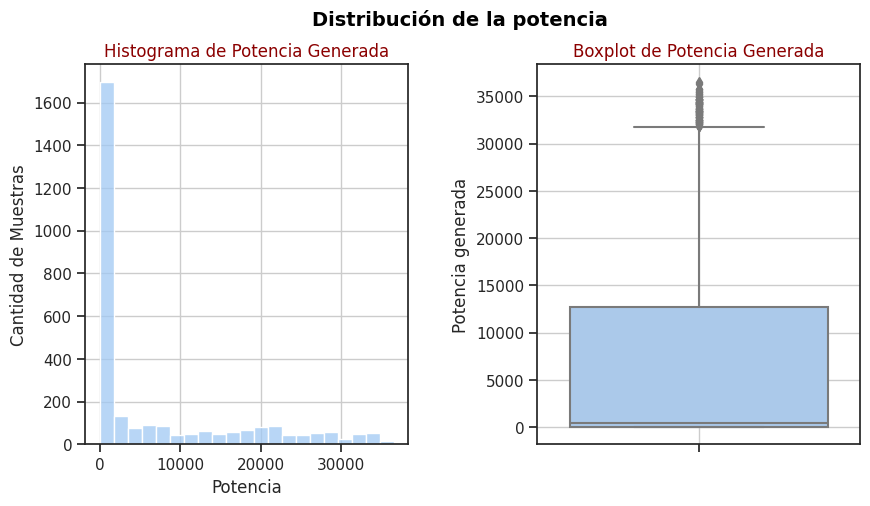

In [ ]:
# estudiamos la distribución de la potencia generada
sns.set_theme(style="ticks", palette="pastel")
# Propiedades para las figuras
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 15}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

fig = plt.figure(figsize=[10,5])
fig.suptitle('Distribución de la potencia', color='black', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.87);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

ax = fig.add_subplot(1, 2, 1)
ax = sns.histplot(x = 'power_gen', data = df, ax=ax, color = 'b')
ax.set_title('Histograma de Potencia Generada', color='darkred', fontsize=12)
ax.set_xlabel('Potencia')
ax.set_ylabel('Cantidad de Muestras')
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(y = 'power_gen', data = df, color = 'b')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de Potencia Generada', color='darkred', fontsize=12)
ax.grid(True)


El histograma nos muestra que la mayoría de las muestras se encuentran con potencia cero o muy baja potencia generada. 
El boxplot nos amplia ésta información indicando que la mediana de la potencia generada se encuentra cercana al cero y los valores por encima de 32000 se consideran outliers. 

Estudiaremos qué sucede con la potencia generada usando la luz solar como filtro. Es decir, analizaremos la potencia generada en presencia y ausencia de luz solar, is_daylight = True y is_daylight = False, respectivamente.

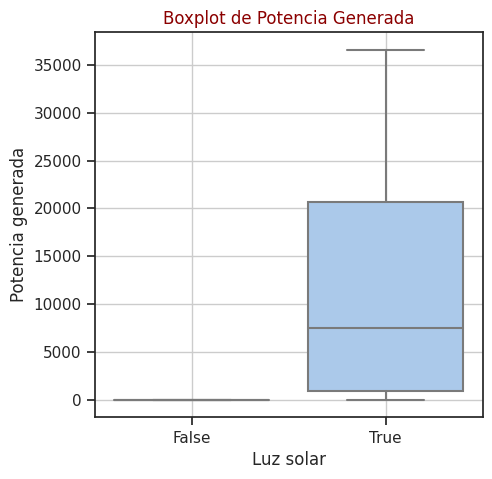

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', x="is_daylight", data = df, color = 'b', ax=ax)
ax.set_xlabel('Luz solar')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de Potencia Generada', color='darkred', fontsize=12)
ax.grid(True)
plt.show()

Como vemos en el boxplot, la potencia generada cuando no hay luz solar es cero. Por lo tanto, para estimar la potencia generada 
se utilizarán las variables solo en el caso de que haya luz solar. Es decir, filtraremos cada una de las variables por la variable categórica is_daylight = True. De esta manera, podremos predecir la potencia generada durante las horas de luz solar, ya que durante las restantes, la potencia será cero. 

Como observamos en el boxplot de la derecha (is_daylight = True), la mediana de potencia aumentó de manera considerable, y ya no se consideran como outliers los valores por encima de 32000.

In [ ]:
# nos quedamos con los datos correspondientes al período de luz solar
df_dia = df.query('is_daylight == True')
df_dia.describe().T

,count,mean,std,min,25%,50%,75%,max
day_year,1805.0,178.772853,101.128628,1.000000,94.000000,176.000000,263.000000,366.000000
year,1805.0,2008.698061,0.459226,2008.000000,2008.000000,2009.000000,2009.000000,2009.000000
month,1805.0,6.377285,3.301890,1.000000,4.000000,6.000000,9.000000,12.000000
day,1805.0,15.754571,8.786273,1.000000,8.000000,16.000000,23.000000,31.000000
first_hour_period,1805.0,12.434903,4.357474,4.000000,10.000000,13.000000,16.000000,19.000000
dist_solar_noon,1805.0,0.309599,0.177346,0.050401,0.151584,0.305898,0.447496,0.775717
avg_temp_day,1805.0,58.829917,6.748194,42.000000,54.000000,59.000000,63.000000,78.000000
avg_wd_day,1805.0,25.259280,6.593715,1.000000,26.000000,27.000000,29.000000,36.000000
avg_ws_day,1805.0,10.324875,4.780630,1.100000,6.900000,10.300000,13.300000,26.600000
sky_over,1805.0,2.019391,1.347643,0.000000,1.000000,2.000000,3.000000,4.000000


Al quitar los datos registrados durante las horas en donde no hay luz solar, conservamos 1805 muestras, por lo que seguimos teniendo datos suficientes para hacer la estimación de la potencoia generada durante el día.

Estudiamos la potencia generada durante las horas de luz solar:

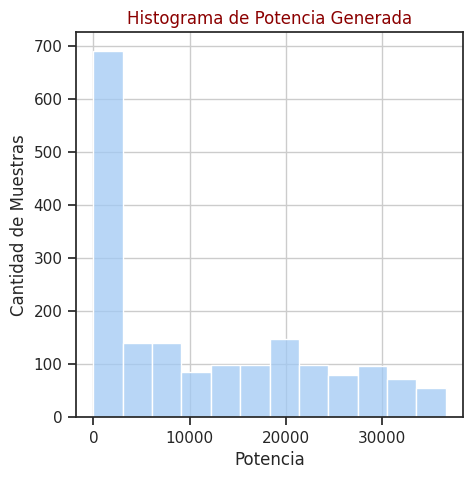

In [ ]:
# estudiamos la distribución de la potencia generada durante las horas de luz solar
fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
sns.set_theme(style="ticks", palette="pastel")
#sns.displot(x = 'power_gen', data = df_dia)
sns.histplot(x = 'power_gen', data = df_dia, ax=ax, color = 'b')
ax.set_title('Histograma de Potencia Generada', color='darkred', fontsize=12)
ax.set_xlabel('Potencia')
ax.set_ylabel('Cantidad de Muestras')
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/02_sn_Hist_Pot.png')

Si bien la distribución se modificó, la tendencia sigue estando hacia los valores bajos de potencia.  

**2. Análisis de la dinámica de la potencia generada**

Graficamos la evolución temporal (por día) de la potencia media generada.

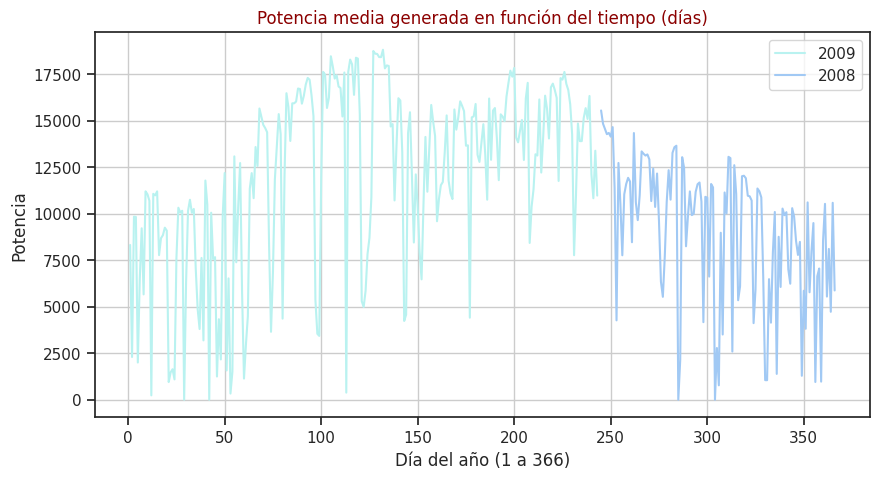

In [ ]:
# Data for plotting
#separamos el detaset en los dos años para los que se recogieron los datos (2008 y 2009) 
# y calculamos la potencia media generada por mes:
df_avg_dia_2008 = df_dia.groupby('day_year').mean().query('year == 2008')
df_avg_dia_2009 = df_dia.groupby('day_year').mean().query('year == 2009')
avg_pot_dia_2008 = df_avg_dia_2008[['power_gen']]
df_dia_2008 = df_dia.query('year == 2008')
t_2008 = df_dia_2008['day_year'].unique()
avg_pot_dia_2009 = df_avg_dia_2009[['power_gen']]
df_dia_2009 = df_dia.query('year == 2009')
t_2009 = df_dia_2009['day_year'].unique()

# gráfica de la dinámica de la potencia en el tiempo (por día del año)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t_2009, avg_pot_dia_2009, "c", label = "2009")
plt.plot(t_2008, avg_pot_dia_2008, "b", label = "2008")
ax.set_title("Potencia media generada en función del tiempo (días)", color='darkred', fontsize=12)
ax.set_xlabel("Día del año (1 a 366)")
ax.set_ylabel("Potencia")
ax.legend()
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/03_mpl_LinePlot_Pot.png')

Para analizar la estacionalidad de la potencia generada y cómo (si es que lo hacen) los distintos meses (correspondientes a las distintas estaciones del año) influyen en ella, graficamos la potencia media generada por mes.

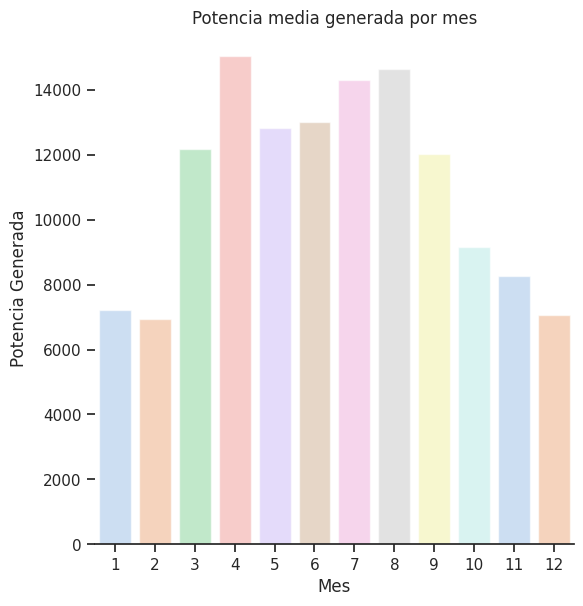

In [ ]:
# Barplot: Gráfica de la potencia media generada por mes
df_dia.groupby('day_year').mean()
g = sns.catplot(
    data=df_dia.groupby('day_year').mean().groupby('month').mean(), kind="bar",
    x=[1,2,3,4,5,6,7,8,9,10,11,12], y="power_gen",
    errorbar="sd", palette="pastel", alpha=.6, height=6, color = 'b'
)
g.despine(left=True)
g.set_axis_labels("Mes", "Potencia Generada")
g.set(title = "Potencia media generada por mes")
g.savefig('../Entregas Coder/Figuras/04_sn_BarPlot_Mes_Pot.png')

Vemos que tenemos mayor poder de generación en los meses 3 a 9.
Ahora vamos a analizar la estabilidad de dichos valores mediante un BoxPlot teniendo en cuenta además los diferentes rangos horarios.

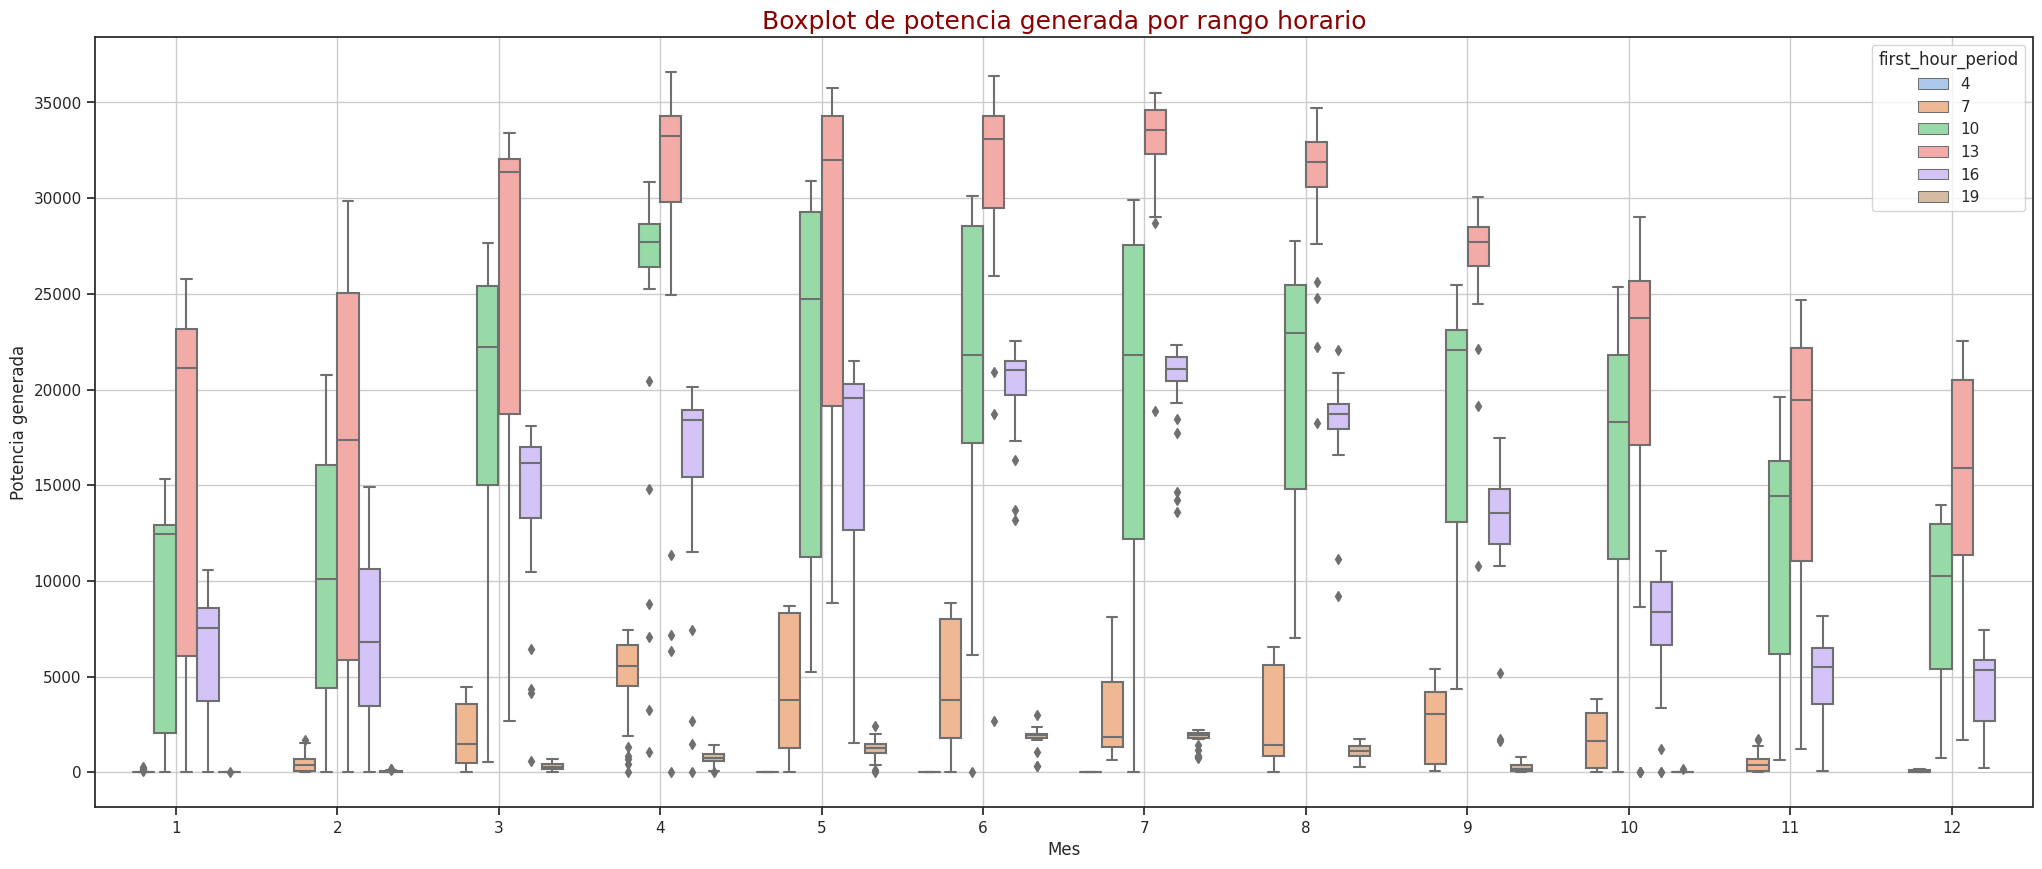

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(25,10)) #defino el tamaño del grafico
sns.boxplot(y = 'power_gen', x = 'month', hue='first_hour_period', data = df_dia, ax=ax, palette="pastel")
ax.set_xlabel('Mes')
ax.set_ylabel('Potencia generada')
ax.set_title('Boxplot de potencia generada por rango horario', color='darkred', fontsize=18)
ax.set_label("Rangos horarios")
ax.grid(True)
plt.show()


La gráfica anterior nos permite sacar varias conclusiones:
1. Vemos que la potencia generada tiene sus valores más altos en los meses 3 a 9 y en el rango horario de 13 a 16 Hs.
2. Podemos observar que los rangos horarios 10-13,13-16 y 16-19 son los que más aportan a la potencia media generada, ya que seguramente sean donde mayor potencia solar tenemos, estamos más cerca del sol, hay mayor temperatura, etc.
3. Vemos que durante los meses de mayor potencia generada, también tenemos una menor dispersión de los datos (variabilidad durante ese mes). Esto nos indica que son meses donde las variables climáticas de interés son más estables, y esa estabilidad se da marcadamente en los horarios de 13-16 y 16-19.

Luego, analizamos la potencia generada a lo largo de todo un año (período en el cual se hizo la adquisición de los datos).

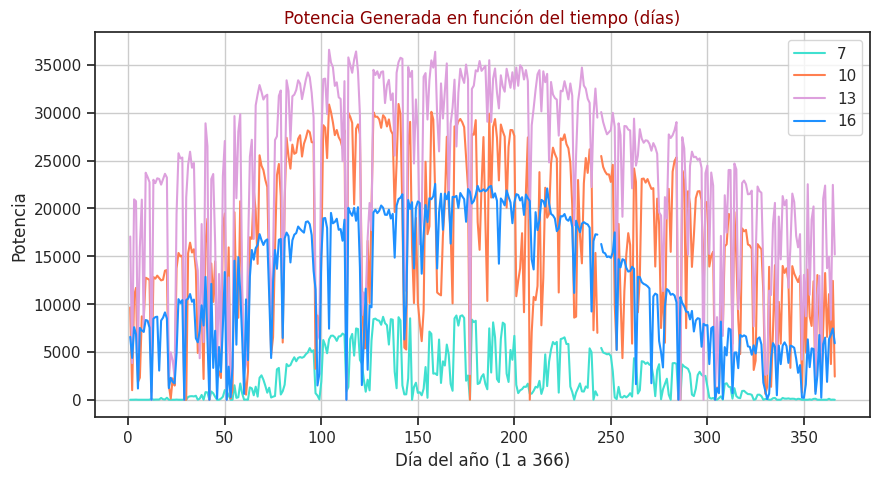

In [ ]:
df_avg_dia_7_2008 = df_dia.loc[df_dia['first_hour_period'] == 7].groupby('day_year').mean().query('year == 2008')
df_avg_dia_10_2008 = df_dia.loc[df_dia['first_hour_period'] == 10].groupby('day_year').mean().query('year == 2008')
df_avg_dia_13_2008 = df_dia.loc[df_dia['first_hour_period'] == 13].groupby('day_year').mean().query('year == 2008')
df_avg_dia_16_2008 = df_dia.loc[df_dia['first_hour_period'] == 16].groupby('day_year').mean().query('year == 2008')

df_avg_dia_7_2009 = df_dia.loc[df_dia['first_hour_period'] == 7].groupby('day_year').mean().query('year == 2009')
df_avg_dia_10_2009 = df_dia.loc[df_dia['first_hour_period'] == 10].groupby('day_year').mean().query('year == 2009')
df_avg_dia_13_2009 = df_dia.loc[df_dia['first_hour_period'] == 13].groupby('day_year').mean().query('year == 2009')
df_avg_dia_16_2009 = df_dia.loc[df_dia['first_hour_period'] == 16].groupby('day_year').mean().query('year == 2009')

avg_pot_dia_7_2008 = df_avg_dia_7_2008[['power_gen']]
avg_pot_dia_10_2008 = df_avg_dia_10_2008[['power_gen']]
avg_pot_dia_13_2008 = df_avg_dia_13_2008[['power_gen']]
avg_pot_dia_16_2008 = df_avg_dia_16_2008[['power_gen']]

avg_pot_dia_7_2009 = df_avg_dia_7_2009[['power_gen']]
avg_pot_dia_10_2009 = df_avg_dia_10_2009[['power_gen']]
avg_pot_dia_13_2009 = df_avg_dia_13_2009[['power_gen']]
avg_pot_dia_16_2009 = df_avg_dia_16_2009[['power_gen']]

df_avg_dia_7 = np.append(df_avg_dia_7_2008,df_avg_dia_7_2009)
df_avg_dia_10 = np.append(df_avg_dia_10_2008,df_avg_dia_10_2009)
df_avg_dia_13 = np.append(df_avg_dia_13_2008,df_avg_dia_13_2009)
df_avg_dia_16 = np.append(df_avg_dia_16_2008,df_avg_dia_16_2009)

colours = ['aquamarine','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'plum','dodgerblue','goldenrod']#, 'coral' , 'silver' , 'gold', 'red', 'blue'];
axtitle_dict = {'color':  'darkred','weight': 'bold','size': 15}
axlab_dict = {'color': 'black','size': 14}


fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t_2008, avg_pot_dia_7_2008, "turquoise", label = "7")
plt.plot(t_2008, avg_pot_dia_10_2008, "coral", label = "10")
plt.plot(t_2008, avg_pot_dia_13_2008, "plum", label = "13")
plt.plot(t_2008, avg_pot_dia_16_2008, "dodgerblue", label = "16")
plt.plot(t_2009, avg_pot_dia_7_2009, "turquoise")
plt.plot(t_2009, avg_pot_dia_10_2009, "coral")
plt.plot(t_2009, avg_pot_dia_13_2009, "plum")
plt.plot(t_2009, avg_pot_dia_16_2009, "dodgerblue")



ax.set_title("Potencia Generada en función del tiempo (días)", color='darkred', fontsize=12)
ax.set_xlabel("Día del año (1 a 366)")
ax.set_ylabel("Potencia")
ax.legend()
ax.grid(True)
plt.show()


#### Análisis de las variables climáticas

**1. Análisis de la distribución de las variables climáticas**

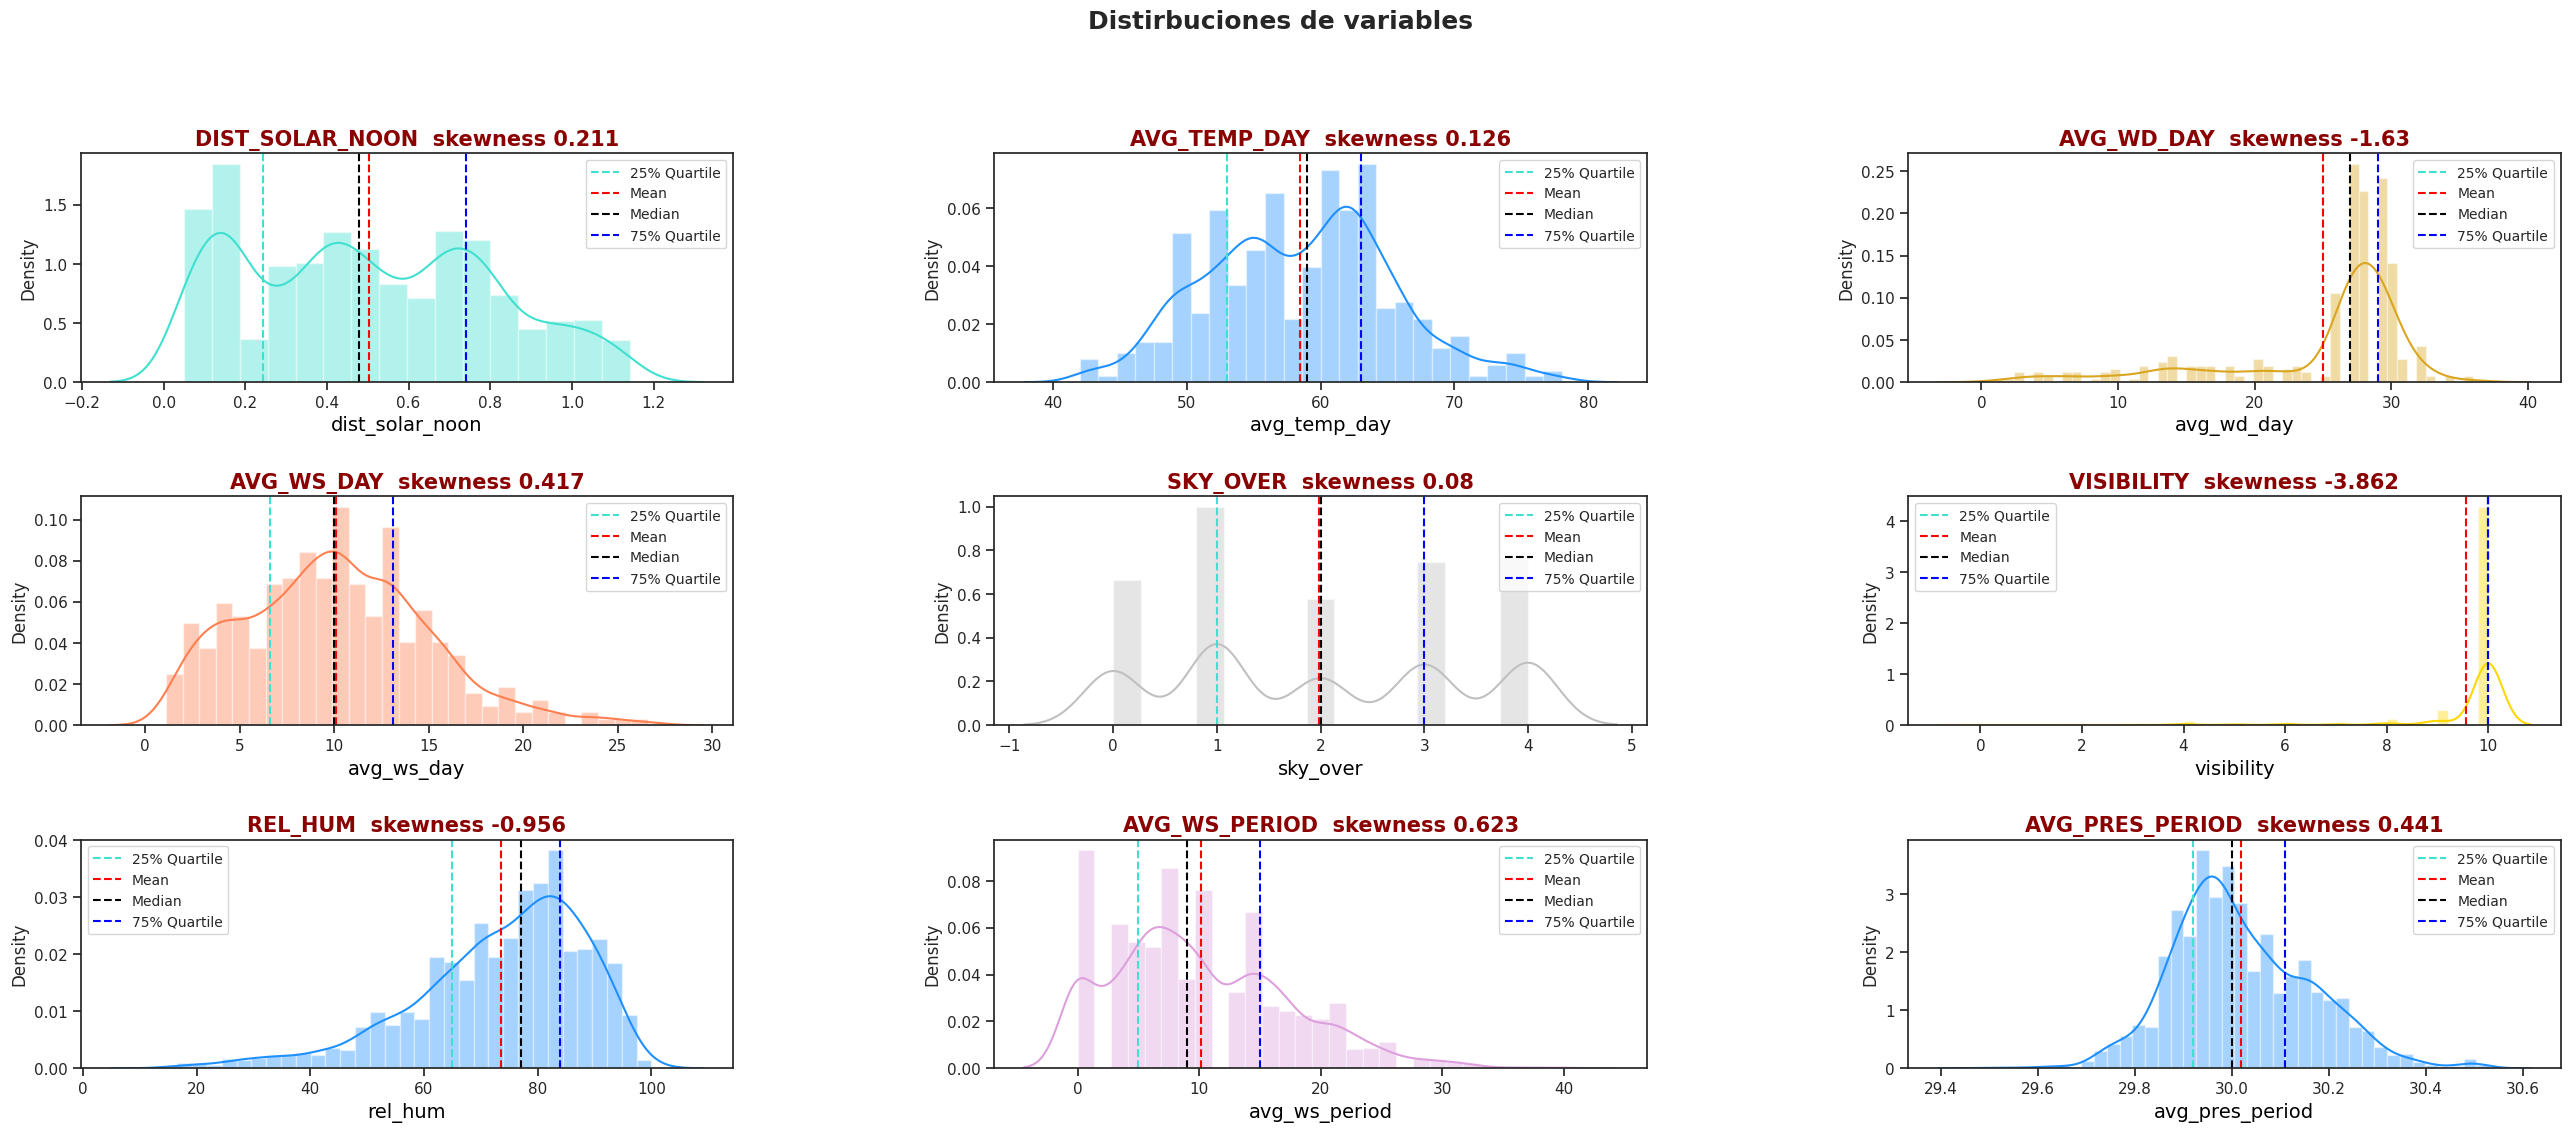

In [ ]:
#Definiciones
df_dia_clima = df_dia.iloc[:,6:15]
df_clima = df.iloc[:,6:15]

# Colores para distribuciones
colours = ['turquoise','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'plum','dodgerblue','goldenrod']#, 'coral' , 'silver' , 'gold', 'red', 'blue'];
axtitle_dict = {'color':  'darkred','weight': 'bold','size': 15}
axlab_dict = {'color': 'black','size': 14, }


fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de variables', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df_clima):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col],  color=colours[i]) 
    # Lineas verticales
    ax.axvline(df[col].quantile(q=0.25),color='turquoise',linestyle='--',label='25% Quartile') # Q1
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean') # Media
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median') # Mediana
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile') # Q3
    # ax.text('asimetria: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}  skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

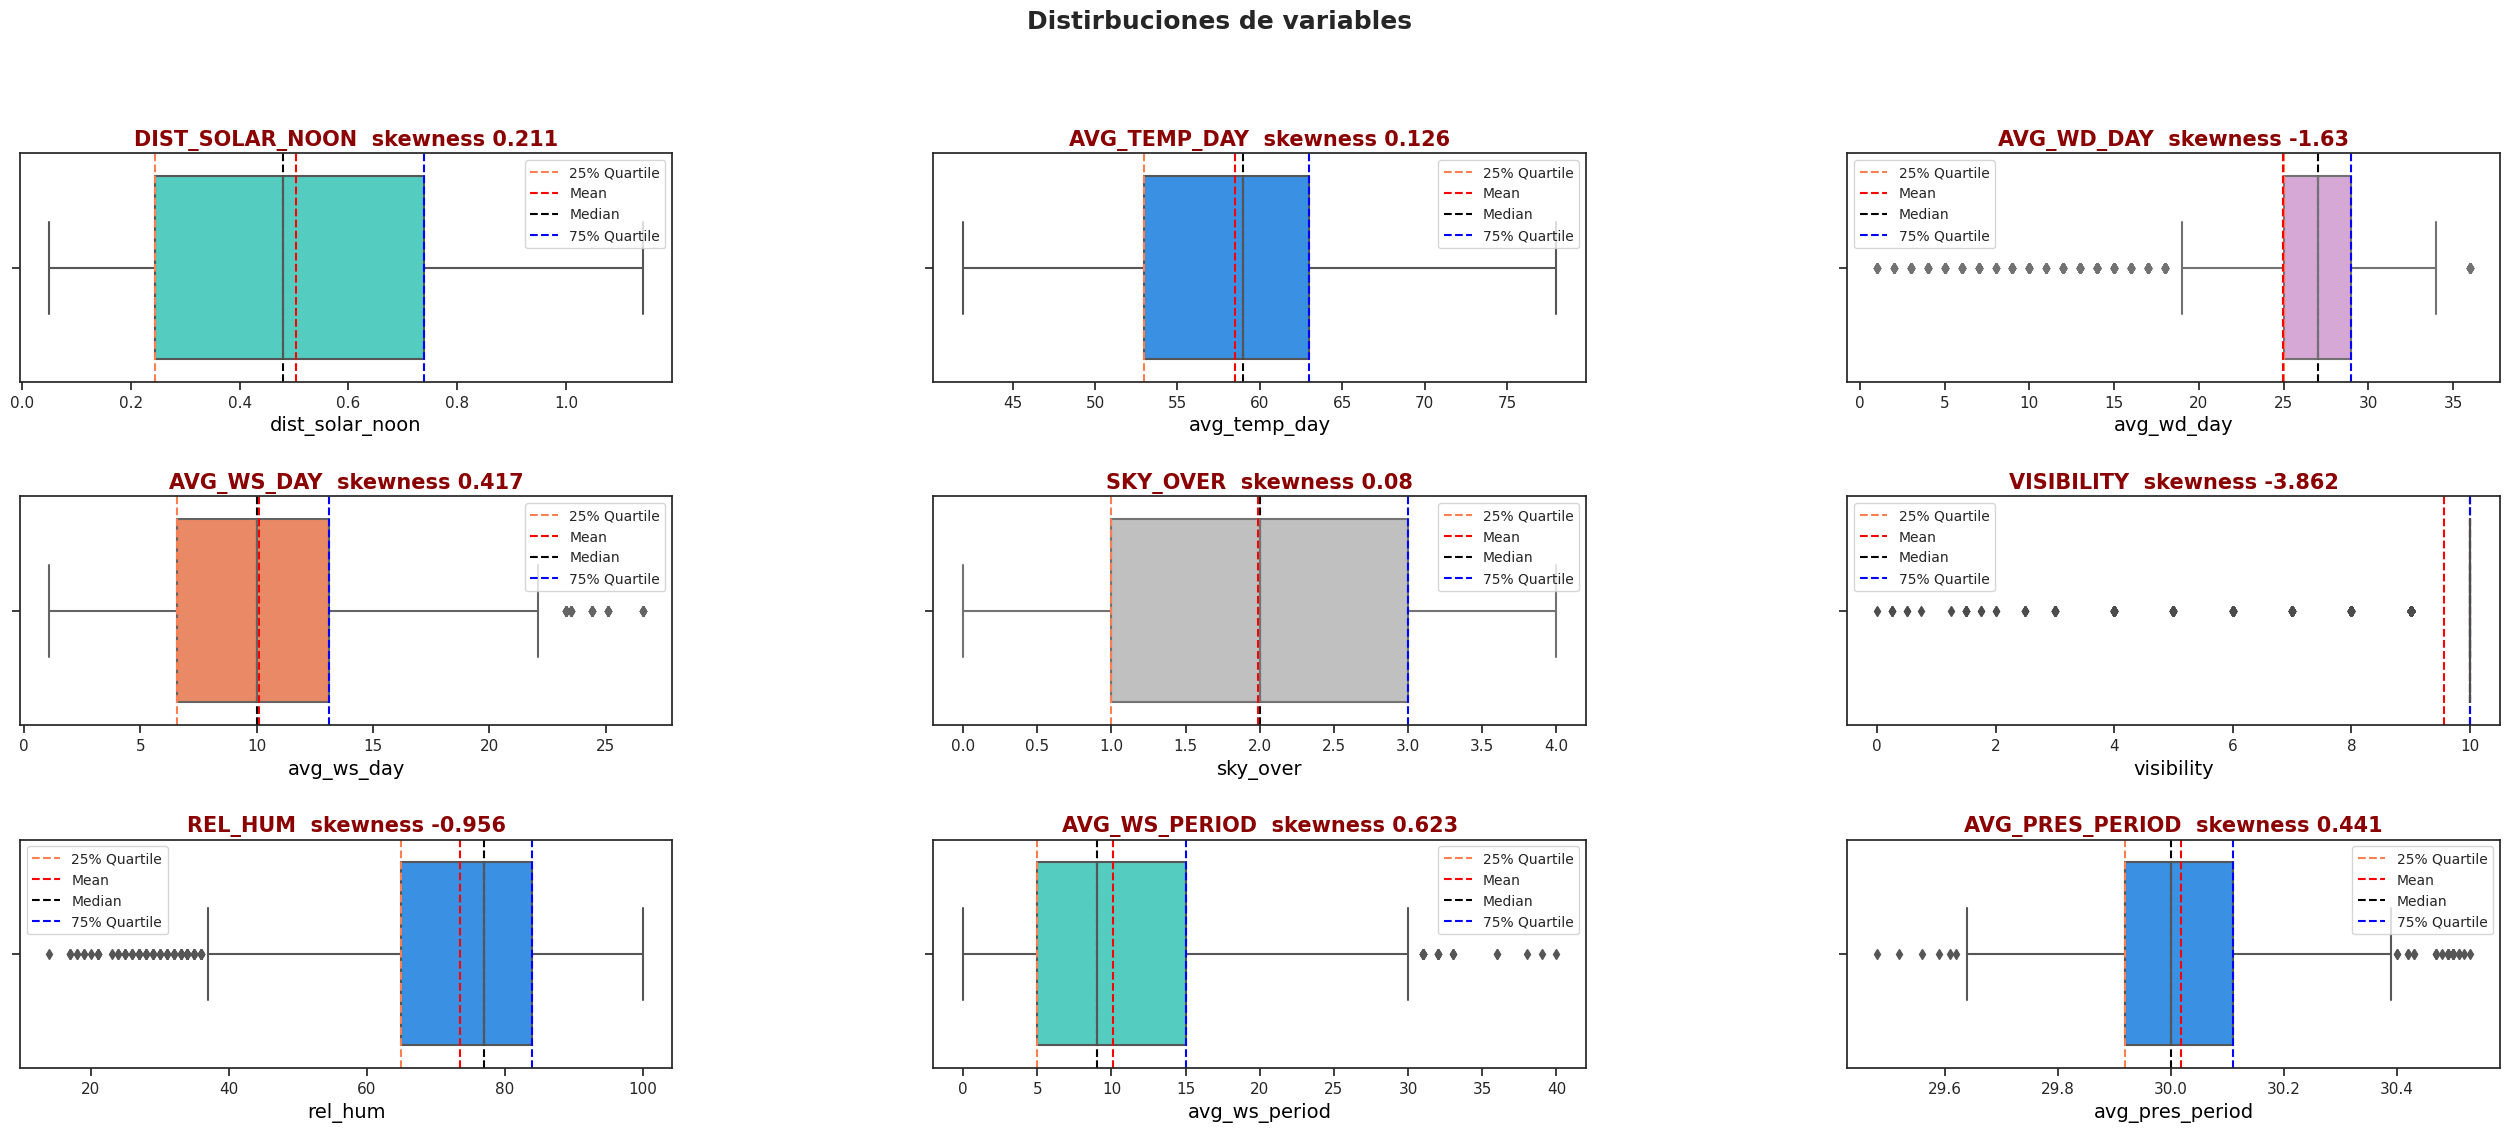

In [ ]:
colours = ['turquoise','dodgerblue','plum', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'turquoise','dodgerblue','plum']
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de variables', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df_clima):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.boxplot(data = df, x=col ,  color= colours[i]);
    # Lineas verticales
    ax.axvline(df[col].quantile(q=0.25),color='coral',linestyle='--',label='25% Quartile') # Q1
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean') # Media
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median') # Mediana
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile') # Q3
    # ax.text('asimetria: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}  skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

**Outliers**

Vemos que las variables presentan varios outliers. En particular, para la visibilidad, tomará todos los valores salvo el 10 como outliers.

In [ ]:
df_clima.describe()

Q1 = df_clima.quantile(0.25)
Q3 = df_clima.quantile(0.75)
IQR = Q3 - Q1

((df_clima < (Q1 - 1.5 * IQR)) | (df_clima > (Q3 + 1.5 * IQR))).any() # Verificar si hay al menos uno con esta condicion
# Si tenemos outliers

dist_solar_noon    False
avg_temp_day       False
avg_wd_day          True
avg_ws_day          True
sky_over           False
visibility          True
rel_hum             True
avg_ws_period       True
avg_pres_period     True
dtype: bool

In [ ]:
# Encontremos el IQR para todas la columnas
dict = {}
for col in df_clima:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

dict

{'upper_limit_dist_solar_noon': 1.4832478081249998,
 'lower_limit_dist_solar_noon': -0.5000063228749999,
 'upper_limit_avg_temp_day': 78.0,
 'lower_limit_avg_temp_day': 38.0,
 'upper_limit_avg_wd_day': 35.0,
 'lower_limit_avg_wd_day': 19.0,
 'upper_limit_avg_ws_day': 22.85,
 'lower_limit_avg_ws_day': -3.1500000000000004,
 'upper_limit_sky_over': 6.0,
 'lower_limit_sky_over': -2.0,
 'upper_limit_visibility': 10.0,
 'lower_limit_visibility': 10.0,
 'upper_limit_rel_hum': 112.5,
 'lower_limit_rel_hum': 36.5,
 'upper_limit_avg_ws_period': 30.0,
 'lower_limit_avg_ws_period': -10.0,
 'upper_limit_avg_pres_period': 30.394999999999996,
 'lower_limit_avg_pres_period': 29.635000000000005}

In [ ]:
for col in df_clima:
    print('Total de {} Valores en {} menores al limite inferior.'.format(len(df[df[col] < dict['lower_limit_' + col]] ) , col))
    print('Total de {} Valores en {} mayores al limite superior.'.format(len(df[df[col] > dict['upper_limit_' + col]] ) , col))

Total de 0 Valores en dist_solar_noon menores al limite inferior.
Total de 0 Valores en dist_solar_noon mayores al limite superior.
Total de 0 Valores en avg_temp_day menores al limite inferior.
Total de 0 Valores en avg_temp_day mayores al limite superior.
Total de 512 Valores en avg_wd_day menores al limite inferior.
Total de 16 Valores en avg_wd_day mayores al limite superior.
Total de 0 Valores en avg_ws_day menores al limite inferior.
Total de 40 Valores en avg_ws_day mayores al limite superior.
Total de 0 Valores en sky_over menores al limite inferior.
Total de 0 Valores en sky_over mayores al limite superior.
Total de 429 Valores en visibility menores al limite inferior.
Total de 0 Valores en visibility mayores al limite superior.
Total de 83 Valores en rel_hum menores al limite inferior.
Total de 0 Valores en rel_hum mayores al limite superior.
Total de 0 Valores en avg_ws_period menores al limite inferior.
Total de 25 Valores en avg_ws_period mayores al limite superior.
Total 

Vemos que en algunas de las variables tenemos una alta tasa de outliers, por lo tanto vamos a reemplazar los outliers por los valores límites.

In [ ]:
for col in df_clima:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col], # si se cumple
        dict['upper_limit_' + col], # poner limite superior (Q3+1.5IQR)
        np.where( # en caso contrario
            df[col] < dict['lower_limit_' + col], # si es menor al limite inferior
            dict['lower_limit_' + col], # poner el Q1-1.5IQR
            df[col]  # si no se cumple nada dejar quieto
        )
    )

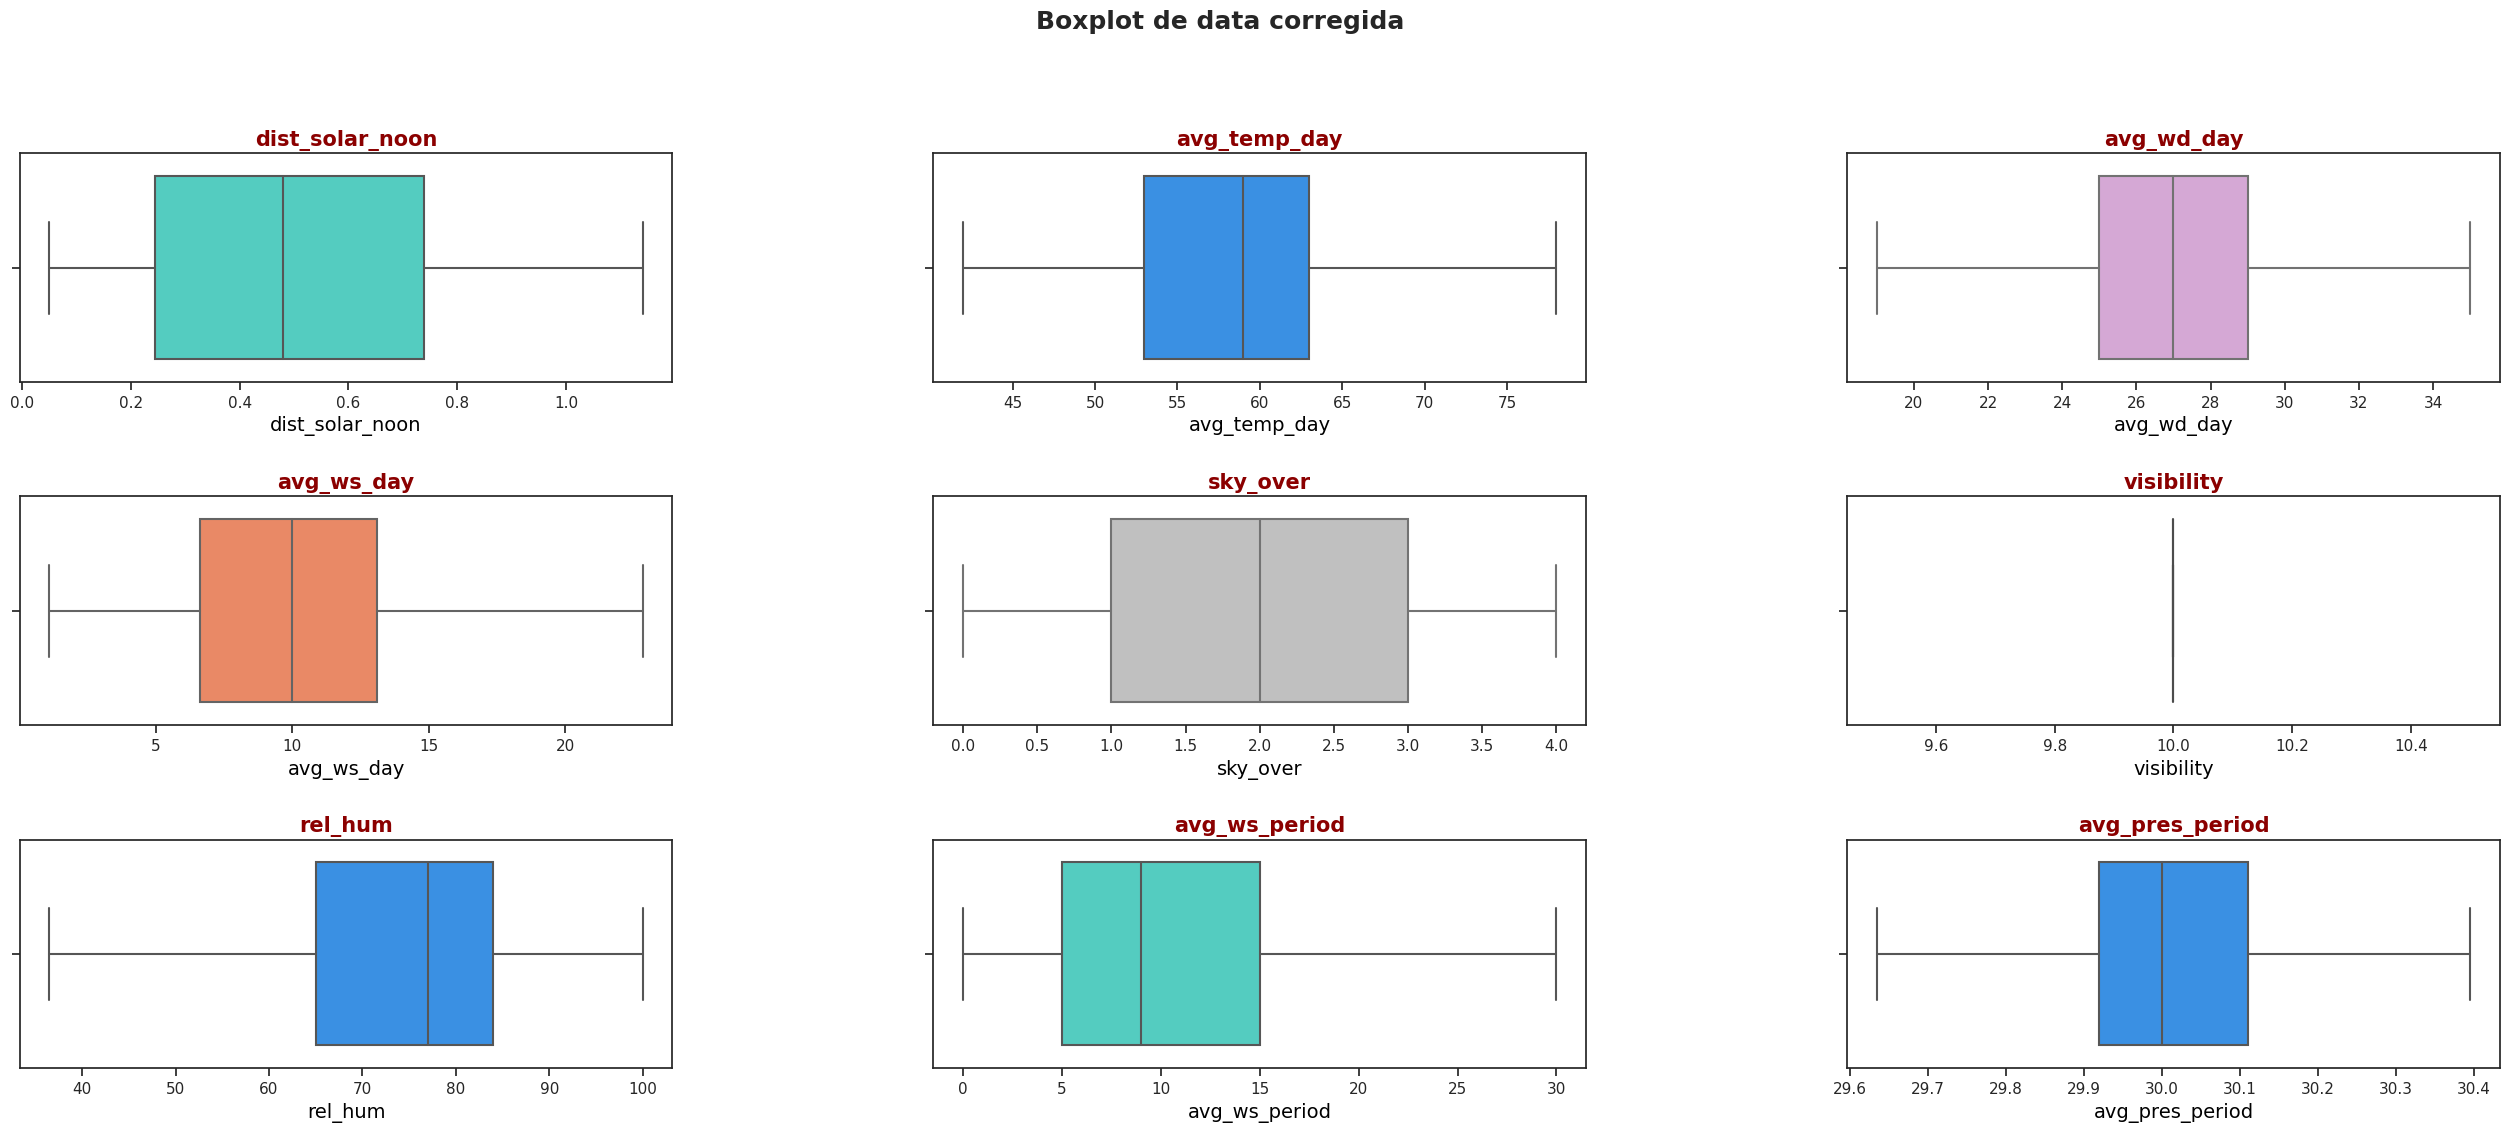

In [ ]:
# Verificando
fig = plt.figure(figsize=[32,24])
fig.suptitle('Boxplot de data corregida', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df_clima):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);

    ax1.set_title(f'{col}', fontdict=axtitle_dict) 
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

Vemos que la visibilidad se quedo con 1 solo valor, esto complicará la correlación de visibilidad con respecto a la potencia generada.

#### Correlación de las variables climáticas con la potencia generada


Para poder encontrar las variables que nos ayudarán a estimar la potencia generada, analizamos, como una primera aproximación, su correlación. Como vimos en las gráficas anteriores, las variables climáticas no tienen, en su mayoría, una distribución normal. Luego, realizaremos la correlación de Spearman (correlación no paramétrica) que no asume distribución normal de las variables. 

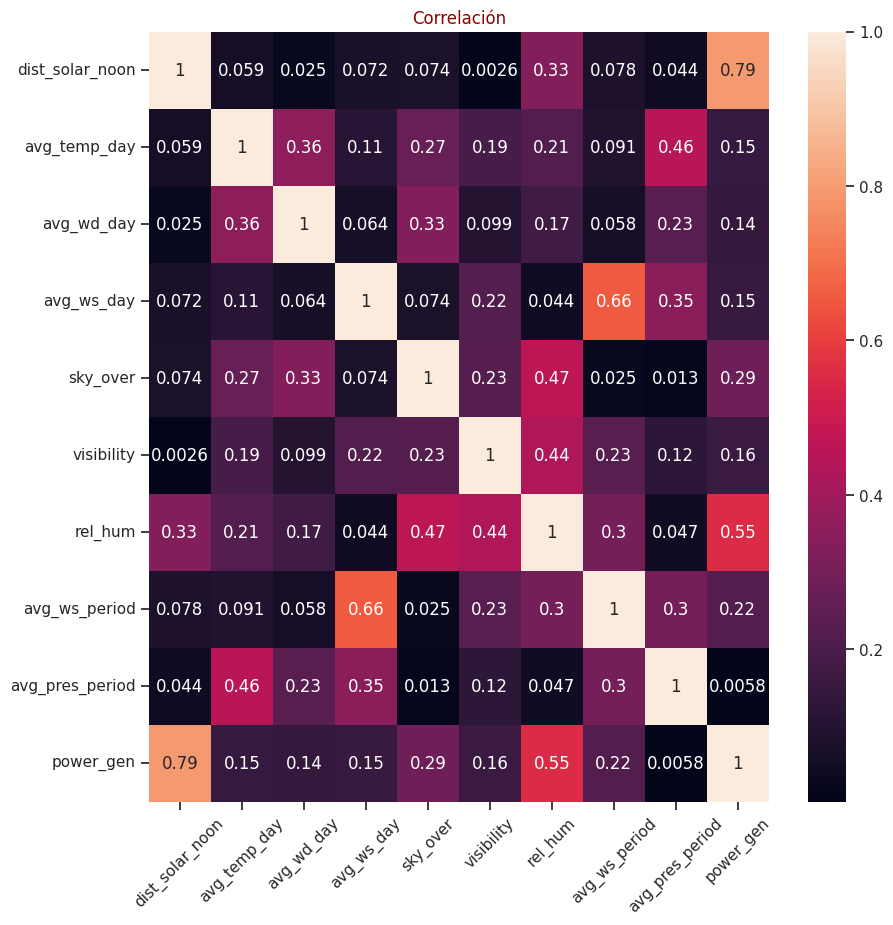

In [ ]:
# Visualizamos la correlación de los datos (variables climáticas) con la potencia generada
corr = df_dia.iloc[:,6:16].corr(method = 'spearman')

fig1, ax = plt.subplots(figsize=(10, 10))
ax.xticklabels = ["Distancia Solar","Temp Promedio", "Direccion Viento",  "Velocidad Viento", "Covertura del cielo", "Visibilidad", "Humedad Relativa", "Velocidad Viento", "Presión","Potencia"]
ax.yticklabels = ["Distancia Solar","Temp Promedio", "Direccion Viento",  "Velocidad Viento", "Covertura del cielo", "Visibilidad", "Humedad Relativa", "Velocidad Viento", "Presión","Potencia"]
sns.heatmap(corr.abs(), annot = True)
ax.set_title('Correlación', color='darkred', fontsize=12)
ax.grid(True)
plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)

plt.show()
fig.savefig('../Entregas Coder/Figuras/05_sn_Corr_Pot_Clima.png')

In [ ]:
round(df_dia.corr(method = 'spearman')['power_gen'].sort_values(ascending = False)[1:] ,2 )

avg_ws_period        0.22
visibility           0.16
avg_ws_day           0.15
avg_temp_day         0.15
avg_wd_day           0.14
year                 0.09
first_hour_period    0.05
month                0.02
day_year             0.02
avg_pres_period      0.01
day                 -0.01
sky_over            -0.29
rel_hum             -0.55
dist_solar_noon     -0.79
is_daylight           NaN
Name: power_gen, dtype: float64

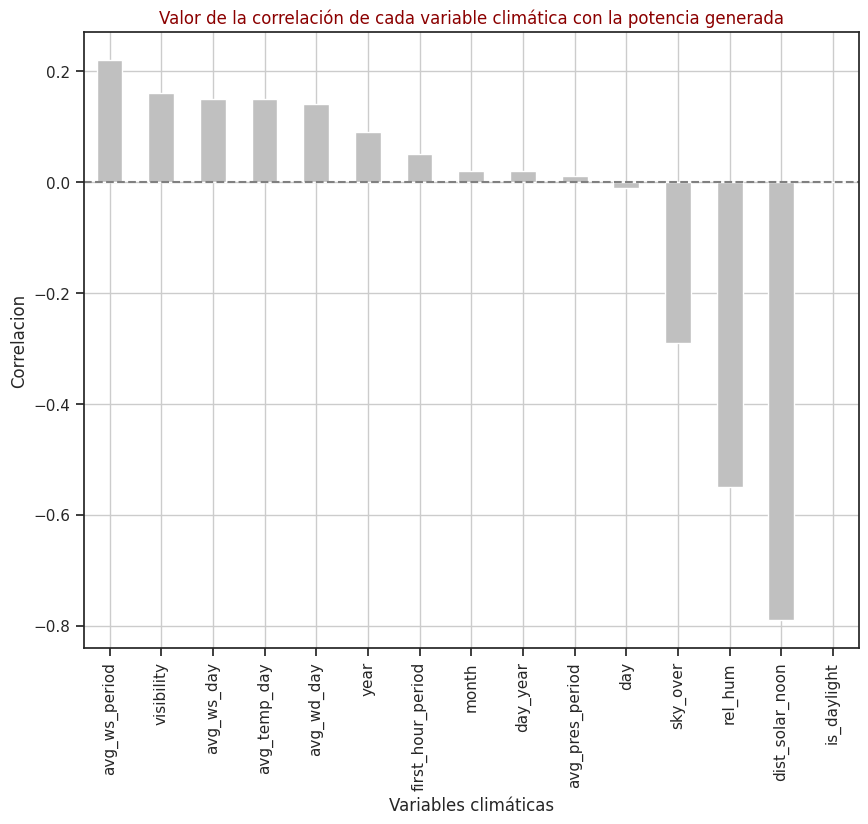

In [ ]:
ax = round(df_dia.corr(method = 'spearman')['power_gen'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar',color='silver' , figsize = (10,8))
ax.set_ylabel('Correlacion')
ax.set_xlabel('Variables climáticas')
ax.set_title('Valor de la correlación de cada variable climática con la potencia generada', color='darkred', fontsize=12)
ax.axhline(0,color='gray',linestyle='--')
ax.grid()
plt.show() 

Podemos observar que la humedad relativa (correlación = -0.55) y la distancia al mediodía solar (correlación = -0.79) son las variables más correlacionadas con la potencia generada. Notar que es lógico que la correlación entre la distancia al mediodía solar y la potencia generada sea negativa, ya que cuanto más distancia haya (myor distancia al sol), menor será la potencia generada. A su vez, que la correlación con la humedad también sea negativa puede indicar que las celdas solares se ven favorecidas por el clima seco.

Entre ellas, no se ve una fuerte correlación (0.33). Luego, es probable que ambas aporten a la potencia generada de manera independiente. 


A continuación, haremos un scatterplot para mostrar en detalle la correlación entre las variables más correlacionadas y la potencia generada.

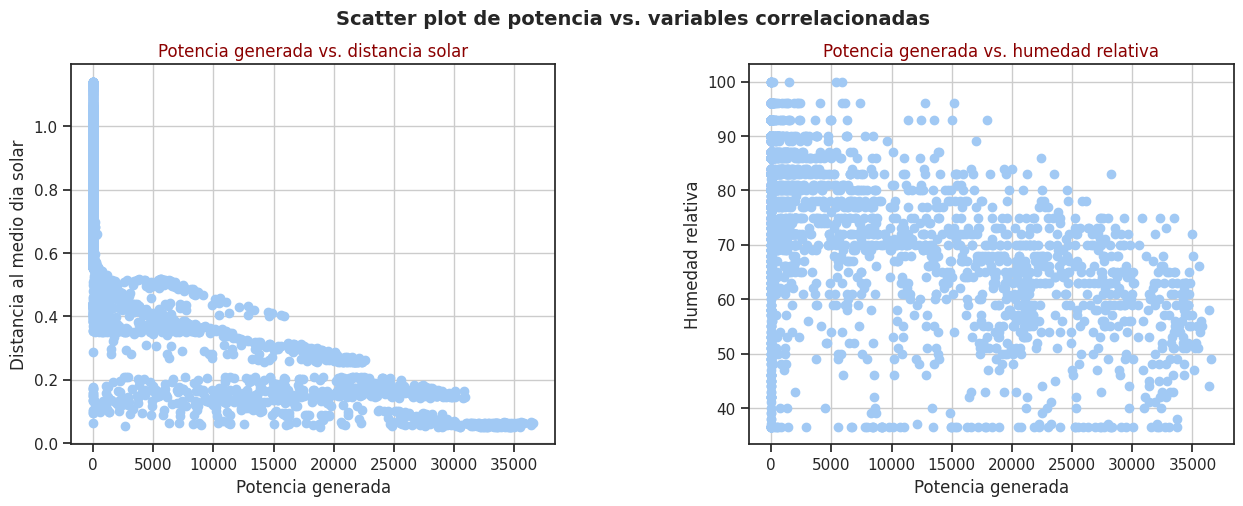

In [ ]:
fig = plt.figure(figsize=[15,5])
fig.suptitle('Scatter plot de potencia vs. variables correlacionadas', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.87);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

ax = fig.add_subplot(1, 2, 1)
ax.scatter(df['power_gen'],df['dist_solar_noon']) 
ax.set_title('Potencia generada vs. distancia solar', color='darkred', fontsize=12)
ax.set_xlabel("Potencia generada")
ax.set_ylabel("Distancia al medio dia solar")
ax.grid(True)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df['power_gen'],df['rel_hum']) 
ax.set_title('Potencia generada vs. humedad relativa', color='darkred', fontsize=12)
ax.set_xlabel("Potencia generada")
ax.set_ylabel("Humedad relativa")
ax.grid(True)



#### Modelo estadístico de regresión lineal

Para finalizar el EDA, haremos una primera aproximación a una regresión construyendo un modelo de regresión lineal para ver de qué manera las variables disponibles se relacionan con la potencia fotovoltaica generada. 
Modelaremos el efecto de varias variables independientes (en este caso, las variables climáticas) para explicar la variación observada en la potencia generada. 
En particular, a partir del análisis del valor de R cuadrado podremos ver qué tan bien las variables climáticas, a partir del modelo de regresión lineal, explican la variación observada en la potencia generada (más adelante, este mismo valor se podrá utilizar para comparar diferentes modelos desarrollados).

Analizar los coeficientes de una regresión lineal para comprender cómo las distintas variables climáticas impactan en la potencia fotovoltaica generada es importante, siendo clave para la traducción de datos en acciones comerciales.
Aunque, actualmente, los algoritmos de aprendizaje automático más avanzados son más populares, es importante empesar nuestro análisis de regresión con una "simple" regresión lineal, en particular por sus capacidades de inferencia e interpretabilidad, para tener una primera aproximación hacia los datos y su influencia en la potencia generada que se quiere predecir. 

En primer lugar, utilizamos la variable más correlacionada con la potencia generada, es decir, la distancia al mediodía solar:

In [ ]:
model_pred_1 = 'power_gen~dist_solar_noon'
lmr_power_gen = smf.ols(formula = model_pred_1, data = df_dia).fit()
print(lmr_power_gen.summary())

                            OLS Regression Results                            
Dep. Variable:              power_gen   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     2696.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:19:23   Log-Likelihood:                -18550.
No. Observations:                1805   AIC:                         3.710e+04
Df Residuals:                    1803   BIC:                         3.711e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         2.63e+04    333.112     

La interpretación del modelo de regresión lineal basado en la distancia al mediodía solar es la siguiente:
- La variable es significativa porque su p value < 0.02
- El modelo no es bueno porque R cuadrado = 0.599
- Para cada unidad que aumenta la distancia al mediodía solar, la potencia generada disminuye 4.848+04 unidades. Notar que la relación con la potencia es inversa (algo que ya habíamos visto en la correlación), ya que a mayor distancia, menor potencia generada.

Veamos ahora qué pasa con la otra variable correlacionada (la humedad relativa):

In [ ]:
model_pred_1 = 'power_gen~rel_hum'
lmr_power_gen = smf.ols(formula = model_pred_1, data = df_dia).fit()
print(lmr_power_gen.summary())

                            OLS Regression Results                            
Dep. Variable:              power_gen   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     599.6
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          1.49e-114
Time:                        17:19:44   Log-Likelihood:                -19116.
No. Observations:                1805   AIC:                         3.824e+04
Df Residuals:                    1803   BIC:                         3.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.621e+04   1042.647     34.731      0.0

El modelo de regresión lineal para la humedad relativa nos muestra que, aunque es significativa (p value <0.02), la humedad relativa explica menos la potencia generada que la distancia al mediodía solar (R cuadrado = 0.250). En particular, por cada unidad de humedad relativa que aumenta, la potencia generada disminuye 358.7 unidades. En este caso, al igual que con la distancia al mediodía solar, la relación también es inversa. 

Si utilizamos las dos variables combinadas, obtenemos lo siguiente:

In [ ]:
model_pred_1 = 'power_gen~dist_solar_noon+rel_hum'
lmr_power_gen = smf.ols(formula = model_pred_1, data = df_dia).fit()
print(lmr_power_gen.summary())

                            OLS Regression Results                            
Dep. Variable:              power_gen   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1982.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:19:58   Log-Likelihood:                -18325.
No. Observations:                1805   AIC:                         3.666e+04
Df Residuals:                    1802   BIC:                         3.667e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.006e+04    677.369     

El valor del R cuadrado aumentó (0.687), mejorando el modelo. En este caso tenemos que, para una misma distancia al mediodía solar, la potencia generada disminuirá 221.95 unidades por cada unidad de humedad relativa que aumente. 

Veamos ahora qué sucede si utilizamos todas las variables climáticas para explicar la potencia generada a partir del modelo de regresión lineal:

In [ ]:
#primer modelo usando todas las variables climáticas
model_pred_1 = 'power_gen~dist_solar_noon+avg_temp_day+avg_wd_day+sky_over+visibility+rel_hum+avg_ws_period+avg_pres_period'
lmr_power_gen = smf.ols(formula = model_pred_1, data = df_dia).fit()
print(lmr_power_gen.summary())

                            OLS Regression Results                            
Dep. Variable:              power_gen   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     605.3
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:20:18   Log-Likelihood:                -18195.
No. Observations:                1805   AIC:                         3.641e+04
Df Residuals:                    1796   BIC:                         3.646e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.972e+04   3.64e+04     

A partir de este primer modelo, podemos hacer las siguientes observaciones:
- El valor del R cuadrado es 0.729: sigue sin ser suficientemente cercano a 1. 
- Las variables avg_temp_day, visibility y avg_pres_period tienen un p value mayor a 0.02; luego, no son significativas.

Veamos qué pasa si hacemos el modelo de regresión lineal descartando estas variables.

In [ ]:
#modelo usando solo las variables climáticas que tienen p value < 0.02
model_pred_1 = 'power_gen~dist_solar_noon+rel_hum+avg_wd_day+sky_over+avg_ws_period'
lmr_power_gen = smf.ols(formula = model_pred_1, data = df_dia).fit()
print(lmr_power_gen.summary())

                            OLS Regression Results                            
Dep. Variable:              power_gen   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     965.3
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:20:31   Log-Likelihood:                -18198.
No. Observations:                1805   AIC:                         3.641e+04
Df Residuals:                    1799   BIC:                         3.644e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.229e+04    915.350     

A partir de este modelo, pordemos hacer las siguientes observaciones:
- El valor del R cuadrado no ha mejorado (es igual al R cuadrado ajustado calculado por el modelo anterior [con todas las variables]). Sin embargo, es mejor (mayor R cuadrado) que el modelo desarrollado utilizando solo la distancia al mediodía solar y la humedad relativa. 
- Los problemas de colinearidad se han solucionado. 

Finalmente, a partir del modelo de regresión lineal vemos que, además de las dos variables correlacionadas con la potencia generada (la distancia al mediodía solar y la humedad relativa), las variables relacionadas con la velocidad del viento (tanto la promedio como la medida por período) y la cobertura del cielo, aportan a explicar la potencia generada. 



**Conclusiones EDA**

Resumiremos aquí las observaciones más relevantes detectadas a partir del EDA: 

- Se observó que la variable Is DayLight, que establece si hay luz solar o no, es determinante para la potencia fotovoltaica generada. En particular, la ausencia de luz solar conlleva a potencia 0. Luego, se decidió trabajar solo con las variables en presencia de luz solar. 
- Se observó una marcada estacionalidad de los datos. En particular, los meses de diciembre, enero, febrero (invierno en el hemisferio norte), y octubre y noviembre (otoño en el hemisferio norte) son los meses en los que menos potencia (en promedio) se genera. Aquí, nos resulta curioso que el pico de potencia se de en abril, ya que el verano es en junio, julio y agosto, donde también se perciben los promedios más altos de generación de potencia. Las principales observaciones respecto de la estacionalidad, así como de la generación de potencia durante el día son las siguientes: 
- La potencia generada tiene sus valores más altos en los meses 3 a 9 (correspondientes, en su mayoría, con la primavera y el verano del hemisferio norte) y en el rango horario de 13 a 16 Hs.
- Los rangos horarios 10-13,13-16 y 16-19 son los que más aportan a la potencia media generada.
- Durante los meses de mayor potencia generada tenemos una menor dispersión de los datos (variabilidad durante ese mes). Esto nos indica que son meses donde las variables climáticas de interés son más estables, y esa estabilidad se da marcadamente en los horarios de 13-16 y 16-19.
- Las variables más correlacionadas con la potencia generada son la distancia al mediodía solar y la humedad relativa. Ademmás, a partir del modelo de regresión lineal vemos que las variables relacionadas con la velocidad del viento (tanto la promedio como la medida por período) y la cobertura del cielo, también aportan para explicar la potencia generada. 



### **PARTE II: Análisis predictivo de regresión**

#### Preparación de los datos

En primer lugar, separamos la potencia generada (que es la variable a predecir) de las variables climáticas que son las que usaremos para armar nuestro modelo.

In [ ]:
#Separación entre las variables a estimar y las variables climáticas 
X = df_dia_clima
y = df_dia['power_gen'] 

Luego, normalizamos los datos:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escalador=MinMaxScaler(feature_range=(0,1))
df_dia_clima_norm=pd.DataFrame(escalador.fit_transform(df_dia_clima),\
                     columns=['dist_solar_noon', 'avg_temp_day', 'avg_wd_day', 'avg_ws_day', 'sky_over', 'visibility', 'rel_hum', 'avg_ws_period', 'avg_pres_period'])
df_dia_clima_norm
df_dia_norm=pd.DataFrame(escalador.fit_transform(df_dia))
X_norm = df_dia_clima_norm
y_norm = df_dia_norm[15]

Finalmente, separamos el dataset en tres subsets:
- train: datos que se usarán para entrenar el modelo de ML
- valid: datos que se usarán solo para optimizar los parámetros internos del modelo de ML (por ejemplo, el k de un modelo de k-nearest neigbours)
- test: datos que se usarán para testear el modelo de Ml y sobre el cual se obtendrán los resultados

In [ ]:
#Separo el dataset entre train y test
X_train , X_test , y_train , y_test = train_test_split(X_norm , y_norm  ,test_size = 0.20 , random_state = 42)

#Separo una porción del train para validar 
X_train , X_valid , y_train , y_valid = train_test_split(X_train , y_train  ,test_size = 0.20 , random_state = 42)

X_train.shape , y_train.shape , X_test.shape , y_test.shape ,  X_valid.shape , y_valid.shape

((1155, 9), (1155,), (361, 9), (361,), (289, 9), (289,))

#### Feature Engineering 

Feature Selection

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


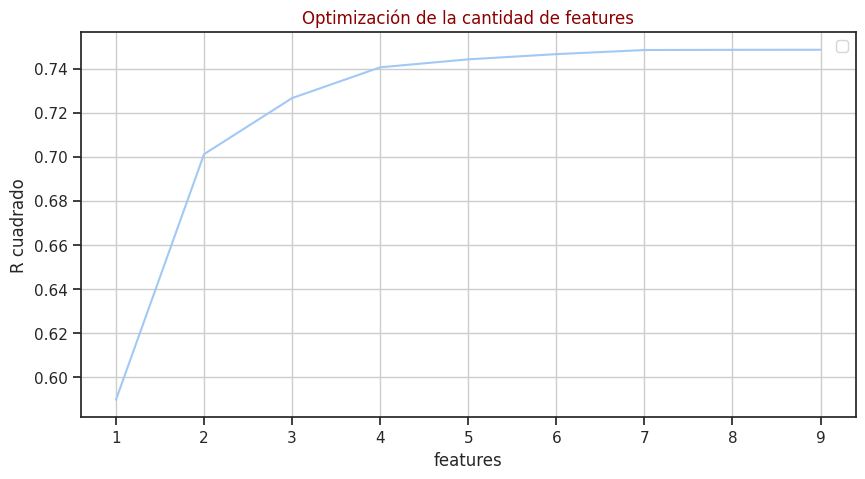

La cantidad de features óptima es: 9
Los features seleccionados son: ('dist_solar_noon', 'avg_temp_day', 'avg_wd_day', 'avg_ws_day', 'sky_over', 'visibility', 'rel_hum', 'avg_ws_period', 'avg_pres_period')


In [ ]:
# optimización de la cantidad de features
r2=[]
for f in [1,2,3,4,5,6,7,8,9]:
  sfs = SFS(LinearRegression(),
          k_features=f,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
  sfs.fit(X_valid, y_valid)
  r2.append(sfs.k_score_)
f_vector = [1,2,3,4,5,6,7,8,9]
#Busco la cantidad de features donde r2 en máximo
max = 0
index = 0
index2 = 0
for n in r2:
    index += 1
    if n > max:
        max = n
        index2 = index -1

f_optimo = f_vector[index2]
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(f_vector, r2)
ax.set_title("Optimización de la cantidad de features", color='darkred', fontsize=12)
ax.set_xlabel("features")
ax.set_ylabel("R cuadrado")
ax.legend()
ax.grid(True)
plt.show()
print('La cantidad de features óptima es:', f_optimo)
print('Los features seleccionados son:', sfs.k_feature_names_)


#### Modelos Machine Learning (ML)

##### Árbol de decisión

In [ ]:
#Entreno el modelo
model_pred_2 = DecisionTreeRegressor(random_state=1234,criterion='squared_error',max_depth=5)
tree_power_gen = model_pred_2.fit(X_train, y_train)

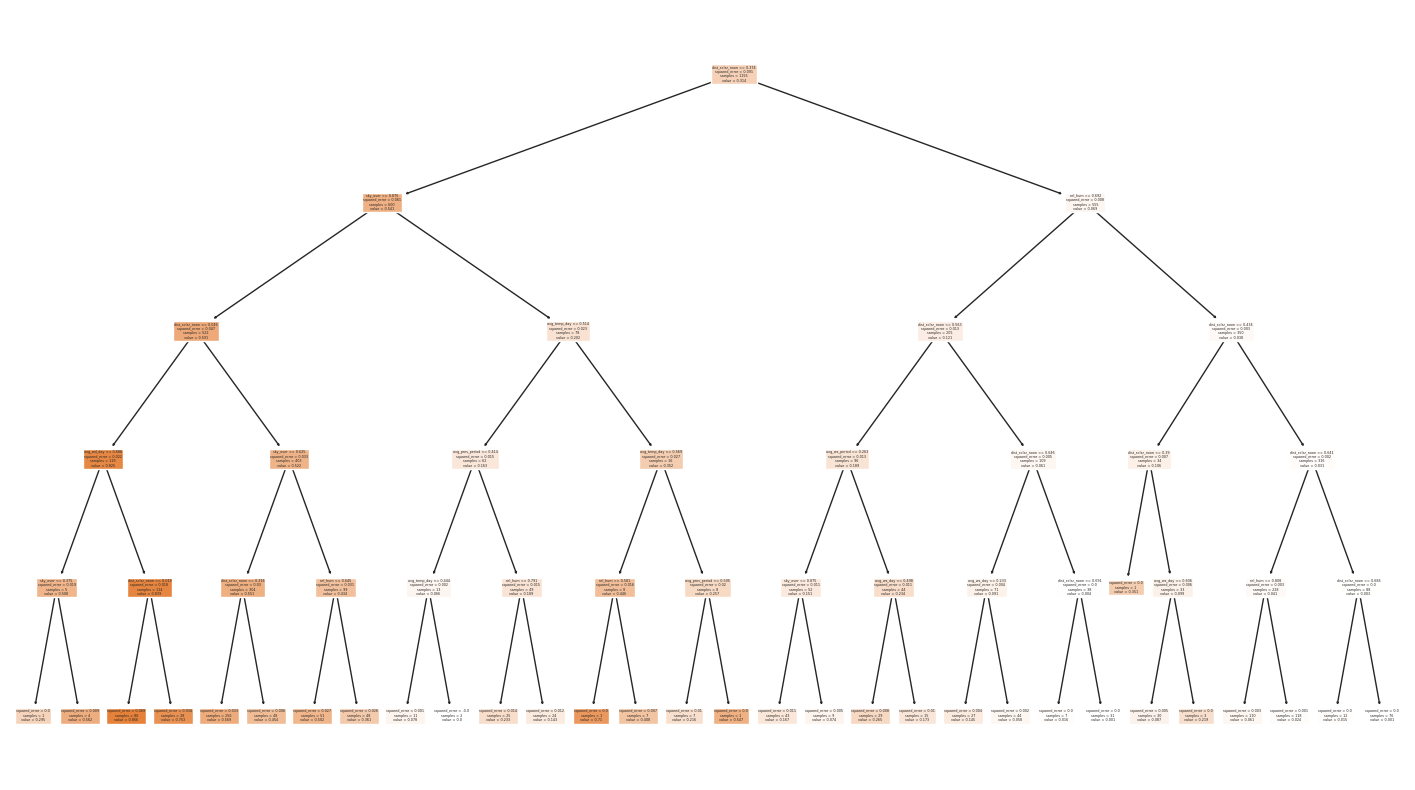

In [ ]:
#Grafico el árbol de decisión resultante
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(model_pred_2,feature_names=X_train.columns,filled=True)
plt.savefig("decision_tree_new.png", bbox_inches='tight')

In [ ]:
#calculo la potencia generada estimada por el modelo
y_pred_tree=tree_power_gen.predict(X_test)
r2 = r2_score(
    y_true=y_test,
    y_pred = y_pred_tree)
n = len(y_test) # Cantidad de Filas del test
k = X_test.shape[1] #Cantidad de Columnas (variables independientes)
r2_adj = 1-((1-r2)*(n-1)/(n-k-1))

print('El R cuadrado del modelo de regresión basado en árboles de decisión es:', r2_score(y_test, y_pred_tree, force_finite=False))
print('El R cuadrado ajustado del modelo de regresión basado en árboles de decisión es:', r2_adj)
print('El MAE del modelo de regresión basado en árboles de decisión es:',mean_absolute_error(y_test,y_pred_tree))
print('El MSE del modelo de regresión basado en árboles de decisión es:',mean_squared_error(y_test,y_pred_tree))
print('El RMSE del modelo de regresión basado en árboles de decisión es:',np.sqrt(mean_squared_error(y_test,y_pred_tree)))


El R cuadrado del modelo de regresión basado en árboles de decisión es: 0.8374791969348282
El R cuadrado ajustado del modelo de regresión basado en árboles de decisión es: 0.833311996856234
El MAE del modelo de regresión basado en árboles de decisión es: 0.0801797438842523
El MSE del modelo de regresión basado en árboles de decisión es: 0.015358434778762625
El RMSE del modelo de regresión basado en árboles de decisión es: 0.12392915225548275


De las metricas obtenidas podemos hacer el siguiente análisis:
Al tener los datos normalizados en valores de 0 a 1 podemos tomar los valores como porcentaje.
1. El valor de R2 de 0.83 es un valor aceptable pero no lo suficientemente alto. Podemos predecir la variable dependiente de una forma correcta.
2. El tener un valor de R2 ajustado cercano a R2 nos indica que todas las variables son independientes y el modelo no se encuentra sobre ajustado.
3. Al tener un valor de MAE cercano a 0.08, podemos asumir que en promedio el error cometido en la predicción es de al rededor de un 8%.
4. EL valor de MSE de 0.015 es un valor lo suficientemente chico para tomarlo como aceptable.
5. El RMSE penaliza los valores de error grandes elevandolos al cuadrado, ya que el mismo puede variar de 0 a infinito, el valor de 0.12 parecería un valor aceptable. 

#### K-nearest neighbors (Knn)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


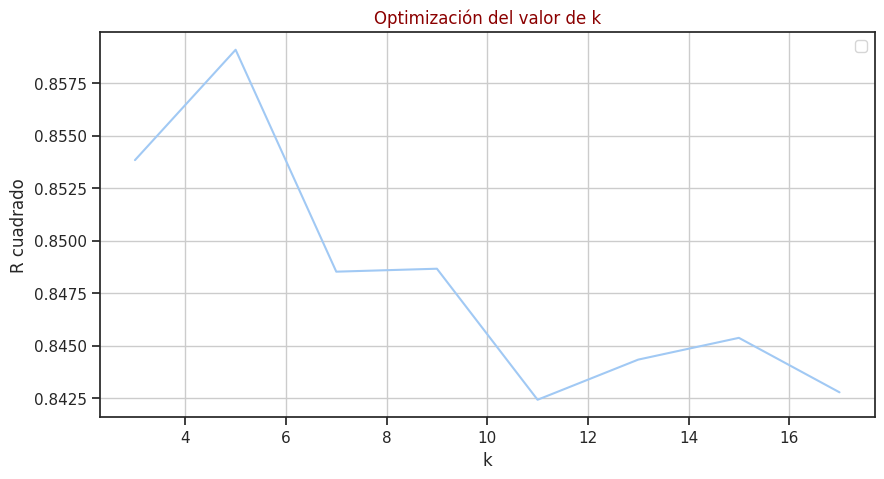

El k óptimo es: 5


In [ ]:
# optimización de k
r2=[]
for k in [3,5,7,9,11,13,15,17]:
  knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski')
  model_knn = knn.fit(X_train, y_train)
  y_pred=model_knn.predict(X_valid)
  r = r2_score(y_valid, y_pred, force_finite=False)
  r2.append(r)
r2
k_vector = [3,5,7,9,11,13,15,17]
#Busco el K donde r2 en máximo
max = 0
index = 0
index2 = 0
for n in r2:
    index +=1
    if n > max:
        max = n
        index2 = index -1
k_optimo = k_vector[index2]
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(k_vector, r2)
ax.set_title("Optimización del valor de k", color='darkred', fontsize=12)
ax.set_xlabel("k")
ax.set_ylabel("R cuadrado")
ax.legend()
ax.grid(True)
plt.show()
print('El k óptimo es:', k_optimo)

In [ ]:
# uso el k óptimo para entrenar el modelo y luego predecir la potencia generada
# entrenamiento
modelo_pred_3 = KNeighborsRegressor(n_neighbors=k_optimo, metric='minkowski') 
knn_power_gen = modelo_pred_3.fit(X_train, y_train)
#calculo la potencia generada estimada por el modelo
y_pred_knn=knn_power_gen.predict(X_test)
r2 = r2_score(y_test, y_pred_knn, force_finite=False)
n = len(y_test) # Cantidad de Filas del test
k = X_test.shape[1] #Cantidad de Columnas (variables independientes)
r2_adj = 1-((1-r2)*(n-1)/(n-k-1))

print('El R cuadrado del modelo de regresión basado en k-nearest neighbors es:', r2_score(y_test, y_pred_knn, force_finite=False))
print('El R cuadrado ajustado del modelo de regresión basado en k-nearest neighbors es:', r2_adj)
print('El MAE del modelo de regresión basado en k-nearest neighbors es:',mean_absolute_error(y_test,y_pred_knn))
print('El MSE del modelo de regresión basado en k-nearest neighbors es:',mean_squared_error(y_test,y_pred_knn))
print('El RMSE del modelo de regresión basado en k-nearest neighbors es:',np.sqrt(mean_squared_error(y_test,y_pred_knn)))



El R cuadrado del modelo de regresión basado en k-nearest neighbors es: 0.8247895454605276
El R cuadrado ajustado del modelo de regresión basado en k-nearest neighbors es: 0.8202969697031053
El MAE del modelo de regresión basado en k-nearest neighbors es: 0.08814722484320785
El MSE del modelo de regresión basado en k-nearest neighbors es: 0.016557623933981858
El RMSE del modelo de regresión basado en k-nearest neighbors es: 0.1286764311518697


De las metricas obtenidas podemos hacer el siguiente análisis:
Al tener los datos normalizados en valores de 0 a 1 podemos tomar los valores como porcentaje.
1. El valor de R2 de 0.82 es un valor aceptable pero no lo suficientemente alto. Podemos predecir la variable dependiente de una forma correcta.
2. El tener un valor de R2 ajustado cercano a R2 nos indica que todas las variables son independientes y el modelo no se encuentra sobre ajustado.
3. Al tener un valor de MAE cercano a 0.09, podemos asumir que en promedio el error cometido en la predicción es de al rededor de un 9%.
4. EL valor de MSE de 0.016 es un valor lo suficientemente chico para tomarlo como aceptable.
5. El RMSE penaliza los valores de error grandes elevandolos al cuadrado, ya que el mismo puede variar de 0 a infinito, el valor de 0.13 parecería un valor aceptable. 

|               | Regresor lineal | Árbol de decisión | k-nearest neighbors | 
| ------------- | --------------- | ----------------- | ------------------- |
| R2            | 0.729  | 0.837 | 0.825 |
| R2 ajustado   | -  | 0.833 | 0.820 |
| MAE           | -  | 0.080 | 0.088 |
| MSE           | -  | 0.015 | 0.017 |
| RMSE          | -  | 0.124 | 0.129 |


Como conclusión podemos decir que los modelos de árbol y vecinos son muy similares, con una pequeña diferencia a favor de los árboles de desición. 

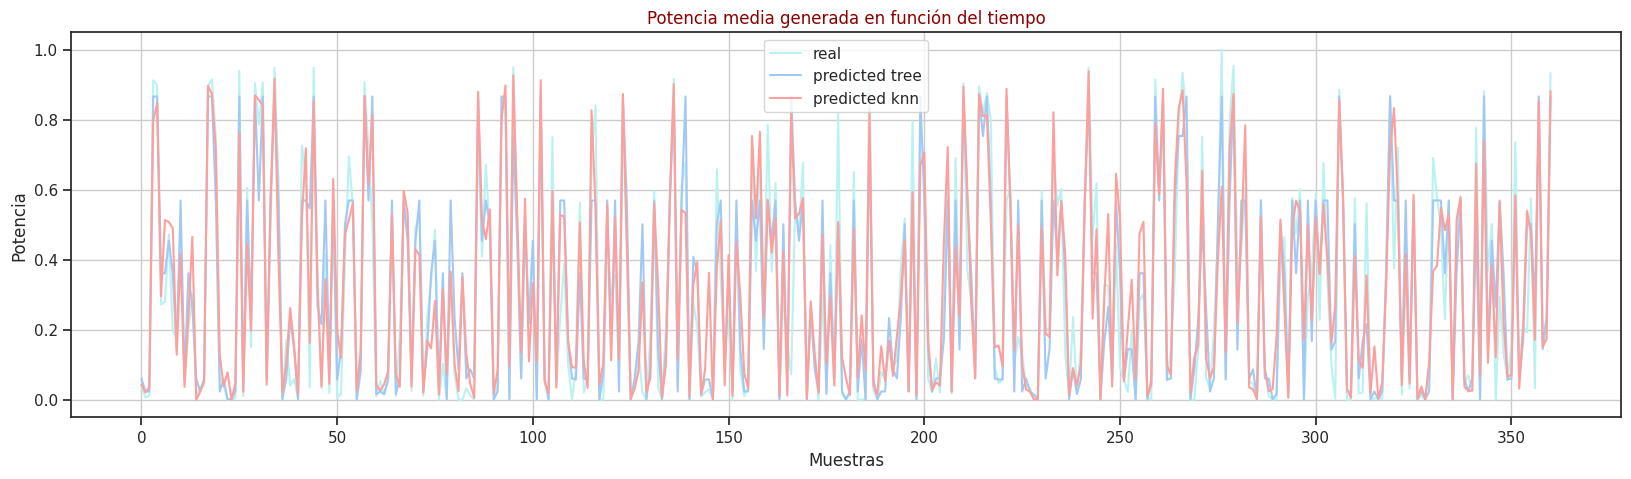

In [ ]:


# gráfica de la dinámica de la potencia en el tiempo (por día del año)
fig, ax = plt.subplots(figsize=(20,5))
y_test_ARR = y_test.reset_index()
plt.plot(y_test_ARR.iloc[:,1], "c", label = "real")
plt.plot(y_pred_tree, "b", label = "predicted tree")
plt.plot(y_pred_knn, "r", label = "predicted knn")
ax.set_title("Potencia media generada en función del tiempo", color='darkred', fontsize=12)
ax.set_xlabel("Muestras")
ax.set_ylabel("Potencia")
ax.legend()
ax.grid(True)
plt.show()
fig.savefig('../Entregas Coder/Figuras/03_mpl_LinePlot_Pot.png')


Como conclusión podemos observar en la grafica que no existe una gran diferencia entre las variables predichas y la variable original pudiendo resultar en una aproximación suficiente para el caso de estudio.
Las muestras que se utilizaron para testear y entrenar fueron separadas aleatoriamente en lugar de hacerlo por rango de tiempo, lo que puede llegar a arrojar resultados diferentes.
Los datos climaticos ingresados a los sistemas de regresion fueron de todos los rangos horarios donde habia luz solar, por lo tanto se podría probar ingresar al regresor con un solo rango horario (el rango mas importante) y ver si dan mejores resultados, aunque los resultados obtenidos parecen ser lo suficientemente cercanos a los reales.

### **APIs**

En pos de mejorar el modelo obtenido hasta aquí, recurrimos a datos adquiridos a través de una API. La API elegida es Open-Meteo, la cual provee la predicción del clima en cualquier ciudad del mundo (en función de su latitud y longitud) para los próximos 7 y hasta 16 días. 

La API elegida brinda una amplia gama de variables climáticas medidas por hora, a saber: 

- Temperature (2 m)*1

- Relative Humidity (2 m)*1

- Dewpoint (2 m)*1

- Apparent Temperature

- Precipitation Probability

- Precipitation (rain + showers + snow)

- Rain

- Showers

- Snowfall

- Snow Depth

- Weathercode

- Sealevel Pressure

- Surface Pressure

- Cloudcover Total, Low, Mid, High

- Visibility

- Evapotranspiration

- Reference Evapotranspiration (ET₀)

- Vapor Pressure Deficit

- Wind Speed (10 m)**, (80 m), (120 m), (180 m)*1

- Wind Direction (10 m)**, (80 m), (120 m), (180 m)*1

- Wind Gusts (10 m)**

- Temperature (80 m), (120 m), (180 m)*1

- Soil Temperature (0 cm), (6 cm), (18 cm), (54 cm)*1

- Soil Moisture (0-1 cm), (1-3 cm), (3-9 cm), (9-27 cm), (27-81 cm)*1

*1 Distancia a la superficie del suelo. 
** Para las variables relacionadas al viento, 10m es la medida estandar.

A su vez, ofrece variables relacionadas con la radiación solar (instantánea y por día):

- Shortwave Solar Radiation 

- Direct Solar Radiation 

- Diffuse Solar Radiation

- Direct Normal Irradiance (DNI) 

- Terrestrial Solar Radiation 


Finalmente, cuenta con variables medidas por día:

- Weathercode

- Maximum Temperature (2 m)

- Minimum Temperature (2 m)

- Maximum Apparent Temperature (2 m)

- Minimum Apparent Temperature (2 m)

- Sunrise

- Sunset

- UV Index

- UV Index Clear Sky

- Precipitation Sum

- Rain Sum

- Showers Sum

- Snowfall Sum

- Precipitation Hours

- Precipitation Probability Max

- Maximum Wind Speed (10 m)

- Maximum Wind Gusts (10 m)

- Dominant Wind Direction (10 m)

- Shortwave Radiation Sum

- Reference Evapotranspiration (ET₀)


La API da la posibilidad de seleccionar qué variables se predecirán en una determinada ciudad (también definida por el usuario). 


Utilizaremos los datos obtenidos desde la API para estimar la potencia que generarían las celdas solares de acuerdo con los modelos desarrollados aquí en los próximos 7 días. En particular, se seleccionarán desde la API variables climáticas análogas o, en su defeto, lo más parecidas posible a las va para evaluar los modelos evaluaremos los modelos se generan las variables 

In [ ]:
import requests
import json
url='https://api.open-meteo.com/v1/forecast?latitude=-32.95&longitude=-60.64&hourly=temperature_2m,relativehumidity_2m,pressure_msl,surface_pressure,cloudcover,visibility,windspeed_10m,windspeed_80m,windspeed_120m,windspeed_180m,winddirection_10m,winddirection_80m,winddirection_120m,winddirection_180m,windgusts_10m,temperature_80m,temperature_120m,temperature_180m,direct_normal_irradiance&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant&current_weather=true&past_days=92&timezone=auto'
df= requests.get(url)
print(df)

<Response [200]>


In [ ]:
print(len(df.text))
df.text

273179


'{"latitude":-33.0,"longitude":-60.625,"generationtime_ms":443.80295276641846,"utc_offset_seconds":-10800,"timezone":"America/Argentina/Cordoba","timezone_abbreviation":"-03","elevation":32.0,"current_weather":{"temperature":24.9,"windspeed":0.8,"winddirection":117.0,"weathercode":3,"time":"2023-03-30T17:00"},"hourly_units":{"time":"iso8601","temperature_2m":"°C","relativehumidity_2m":"%","pressure_msl":"hPa","surface_pressure":"hPa","cloudcover":"%","visibility":"m","windspeed_10m":"km/h","windspeed_80m":"km/h","windspeed_120m":"km/h","windspeed_180m":"km/h","winddirection_10m":"°","winddirection_80m":"°","winddirection_120m":"°","winddirection_180m":"°","windgusts_10m":"km/h","temperature_80m":"°C","temperature_120m":"°C","temperature_180m":"°C","direct_normal_irradiance":"W/m²"},"hourly":{"time":["2022-12-28T00:00","2022-12-28T01:00","2022-12-28T02:00","2022-12-28T03:00","2022-12-28T04:00","2022-12-28T05:00","2022-12-28T06:00","2022-12-28T07:00","2022-12-28T08:00","2022-12-28T09:00"

In [ ]:
texto=df.text
json.loads(texto)

{'latitude': -33.0,
 'longitude': -60.625,
 'generationtime_ms': 423.4640598297119,
 'utc_offset_seconds': -10800,
 'timezone': 'America/Argentina/Cordoba',
 'timezone_abbreviation': '-03',
 'elevation': 32.0,
 'current_weather': {'temperature': 23.7,
  'windspeed': 9.5,
  'winddirection': 53.0,
  'weathercode': 3,
  'time': '2023-03-30T14:00'},
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relativehumidity_2m': '%',
  'pressure_msl': 'hPa',
  'surface_pressure': 'hPa',
  'cloudcover': '%',
  'visibility': 'm',
  'windspeed_10m': 'km/h',
  'windspeed_80m': 'km/h',
  'windspeed_120m': 'km/h',
  'windspeed_180m': 'km/h',
  'winddirection_10m': '°',
  'winddirection_80m': '°',
  'winddirection_120m': '°',
  'winddirection_180m': '°',
  'windgusts_10m': 'km/h',
  'temperature_80m': '°C',
  'temperature_120m': '°C',
  'temperature_180m': '°C',
  'direct_normal_irradiance': 'W/m²'},
 'hourly': {'time': ['2022-12-28T00:00',
   '2022-12-28T01:00',
   '2022-12-28T02:00',
   

In [ ]:
jsondata=json.loads(texto)
df2=pd.DataFrame.from_dict(jsondata['hourly'])
#texto['temperature_2m']
#df2=pd.DataFrame.from_dict(jsondata, orient='column')
df2

,time,temperature_2m,relativehumidity_2m,pressure_msl,surface_pressure,cloudcover,visibility,windspeed_10m,windspeed_80m,windspeed_120m,windspeed_180m,winddirection_10m,winddirection_80m,winddirection_120m,winddirection_180m,windgusts_10m,temperature_80m,temperature_120m,temperature_180m,direct_normal_irradiance
0,2022-12-28T00:00,23.5,47,1009.8,1006.1,0,24140.0,7.1,19.9,21.1,18.4,311,314,313,309,12.6,26.9,28.2,27.7,0.0
1,2022-12-28T01:00,22.5,50,1009.4,1005.7,0,24140.0,8.4,22.9,28.3,25.5,313,312,314,312,15.1,24.9,26.9,27.0,0.0
2,2022-12-28T02:00,21.6,53,1009.0,1005.3,0,24140.0,9.4,25.1,32.8,34.5,328,322,322,320,16.6,23.8,24.7,25.7,0.0
3,2022-12-28T03:00,20.9,58,1009.1,1005.4,0,24140.0,10.9,28.8,36.5,44.4,326,326,326,327,21.2,22.2,22.4,23.3,0.0
4,2022-12-28T04:00,20.3,62,1009.0,1005.2,0,24140.0,10.7,27.3,36.2,46.4,327,326,326,324,20.2,21.1,21.6,23.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,2023-04-05T19:00,22.0,52,1017.1,1013.3,45,24140.0,10.2,17.6,19.1,19.6,82,79,78,77,19.8,21.9,21.4,20.6,375.6
2372,2023-04-05T20:00,20.5,60,1017.3,1013.5,44,24140.0,8.0,17.8,21.0,21.6,85,82,78,75,15.1,21.5,21.2,20.5,0.0
2373,2023-04-05T21:00,18.8,68,1017.6,1013.8,43,24140.0,6.1,18.6,23.3,24.9,90,81,77,72,10.8,20.7,20.8,20.3,0.0
2374,2023-04-05T22:00,17.9,71,1017.8,1014.0,33,24140.0,6.1,19.9,26.0,28.8,87,77,73,70,11.9,20.0,20.3,20.0,0.0
